In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from scipy import stats
import librosa
import tempfile

from bcmi import BCMICalibrationLoader, BCMITrainingLoader
from data import EEGMusicDataset
from data import copy_from_dataloader_into_dir
from src.plotting import plot_trial_data

# %load_ext autoreload
# %autoreload 2

/home/zmrocze/studia/uwr/magisterka/.devenv/state/venv/lib/python3.12/site-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()


In [2]:
def load_separate_datasets(bcmi_root_path: str):
    """Load BCMI training and calibration datasets separately for comparison."""
    
    # Load training dataset
    training_temp_dir = Path(tempfile.mkdtemp(prefix="bcmi_training_"))
    training_loader = BCMITrainingLoader(f"{bcmi_root_path}/bcmi-training", dataset_name="bcmi-training")
    training_loader.load_all_subjects()
    copy_from_dataloader_into_dir(training_loader, training_temp_dir)
    training_dataset = EEGMusicDataset.load_ondisk(training_temp_dir)
    del training_loader
    
    # Load calibration dataset
    calibration_temp_dir = Path(tempfile.mkdtemp(prefix="bcmi_calibration_"))
    calibration_loader = BCMICalibrationLoader(f"{bcmi_root_path}/bcmi-calibration", dataset_name="bcmi-calibration")
    calibration_loader.load_all_subjects()
    copy_from_dataloader_into_dir(calibration_loader, calibration_temp_dir)
    calibration_dataset = EEGMusicDataset.load_ondisk(calibration_temp_dir)
    del calibration_loader
    
    return training_dataset, calibration_dataset

# Load the datasets
training_ds, calibration_ds = load_separate_datasets("./datasets/bcmi")
print(f"Training dataset: {len(training_ds)} trials")
print(f"Calibration dataset: {len(calibration_ds)} trials")

Loading subject 08 (bcmi-training):
  ✓ Run 1 ses-3: 1008.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1005.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1010.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1011.0s, 36 events, 36 trials
Loading subject 09 (bcmi-training):
  ✓ Run 1 ses-3: 1038.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1052.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 3 ses-3: 1034.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1036.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1045.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1033.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1034.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1031.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1036.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1032.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1016.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1026.0s, 36 events, 36 trials
Loading subject 10 (bcmi-training):
  ✓ Run 1 ses-3: 1095.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1115.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1151.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1068.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1130.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1108.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1134.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set t

  ✓ Run 4 ses-1: 1069.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1112.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1128.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1105.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1053.0s, 36 events, 36 trials
Loading subject 11 (bcmi-training):
  ✓ Run 1 ses-3: 1089.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1131.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1122.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1080.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1245.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1226.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1188.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1148.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1169.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1162.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1111.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1136.0s, 36 events, 36 trials
Loading subject 12 (bcmi-training):


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 1 ses-3: 1052.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1035.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1065.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1044.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1089.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1072.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1046.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1051.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1066.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1092.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1053.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1070.0s, 36 events, 36 trials
Loading subject 13 (bcmi-training):
  ✓ Run 1 ses-3: 1035.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1041.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1028.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1035.0s, 36 events, 36 trials
  ✓ Run 1 ses-1: 1057.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1059.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 3 ses-1: 1032.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1030.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1048.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1051.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1031.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1023.0s, 36 events, 36 trials
Loading subject 14 (bcmi-training):
  ✓ Run 1 ses-1: 1202.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1079.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1167.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1182.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1067.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1068.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1055.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1031.0s, 36 events, 36 trials
Loading subject 15 (bcmi-training):
  ✓ Run 1 ses-3: 1084.0s, 36 events, 36 trials
  ✓ Run 2 ses-3: 1072.0s, 36 events, 36 trials
  ✓ Run 3 ses-3: 1075.0s, 36 events, 36 trials
  ✓ Run 4 ses-3: 1074.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 1 ses-1: 1093.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1080.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1069.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1053.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1075.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1080.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1075.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1080.0s, 36 events, 36 trials
Loading subject 16 (bcmi-training):
  ✓ Run 1 ses-1: 1057.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1037.0s, 36 events, 36 trials
  ✓ Run 3 ses-1: 1038.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1038.0s, 36 events, 36 trials
  ✓ Run 1 ses-2: 1068.0s, 36 events, 36 trials
  ✓ Run 2 ses-2: 1054.0s, 36 events, 36 trials
  ✓ Run 3 ses-2: 1031.0s, 36 events, 36 trials
  ✓ Run 4 ses-2: 1035.0s, 36 events, 36 trials
Loading subject 17 (bcmi-training):
  ✓ Run 1 ses-1: 1049.0s, 36 events, 36 trials
  ✓ Run 2 ses-1: 1038.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 3 ses-1: 1034.0s, 36 events, 36 trials
  ✓ Run 4 ses-1: 1031.0s, 36 events, 36 trials


/home/zmrocze/studia/uwr/magisterka/src/data.py:293: WavFileWarning: Reached EOF prematurely; finished at 3145728 bytes, expected 7056134 bytes from header.
  sample_rate, raw_data = wavfile.read(self.filepath)


Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 secs...
Reading 0 ... 19999  =      0.000 ...    19.999 

/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 5: 817.0s, 36 events, 18 trials
Loading subject 04 (bcmi-calibration):
  ✓ Run 1: 984.0s, 36 events, 18 trials
  ✓ Run 1: 984.0s, 36 events, 18 trials
  ✓ Run 2: 935.0s, 36 events, 18 trials
  ✓ Run 3: 868.0s, 36 events, 18 trials
  ✓ Run 2: 935.0s, 36 events, 18 trials
  ✓ Run 3: 868.0s, 36 events, 18 trials
  ✓ Run 4: 831.0s, 36 events, 18 trials
  ✓ Run 4: 831.0s, 36 events, 18 trials
  ✓ Run 5: 800.0s, 36 events, 18 trials
Loading subject 05 (bcmi-calibration):
  ✓ Run 1: 886.0s, 36 events, 18 trials
  ✓ Run 5: 800.0s, 36 events, 18 trials
Loading subject 05 (bcmi-calibration):
  ✓ Run 1: 886.0s, 36 events, 18 trials
  ✓ Run 2: 881.0s, 36 events, 18 trials
  ✓ Run 3: 857.0s, 36 events, 18 trials
  ✓ Run 2: 881.0s, 36 events, 18 trials
  ✓ Run 3: 857.0s, 36 events, 18 trials
  ✓ Run 4: 878.0s, 36 events, 18 trials
  ✓ Run 5: 833.0s, 36 events, 18 trials
Loading subject 06 (bcmi-calibration):
  ✓ Run 1: 845.0s, 18 events, 18 trials
  ✓ Run 2: 836.0s, 36 events, 18 trials
  ✓ 

/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 2: 845.0s, 36 events, 18 trials
  ✓ Run 3: 847.0s, 36 events, 18 trials
  ✓ Run 4: 816.0s, 36 events, 18 trials
  ✓ Run 4: 816.0s, 36 events, 18 trials
  ✓ Run 5: 796.0s, 36 events, 18 trials
Loading subject 08 (bcmi-calibration):
  ✓ Run 1: 897.0s, 36 events, 18 trials
  ✓ Run 5: 796.0s, 36 events, 18 trials
Loading subject 08 (bcmi-calibration):
  ✓ Run 1: 897.0s, 36 events, 18 trials
  ✓ Run 2: 845.0s, 36 events, 18 trials
  ✓ Run 2: 845.0s, 36 events, 18 trials
  ✓ Run 3: 835.0s, 36 events, 18 trials
  ✓ Run 4: 822.0s, 36 events, 18 trials
  ✓ Run 3: 835.0s, 36 events, 18 trials
  ✓ Run 4: 822.0s, 36 events, 18 trials
  ✓ Run 5: 818.0s, 36 events, 18 trials
Loading subject 09 (bcmi-calibration):
  ✓ Run 5: 818.0s, 36 events, 18 trials
Loading subject 09 (bcmi-calibration):
  ✓ Run 1: 875.0s, 36 events, 18 trials
  ✓ Run 2: 838.0s, 36 events, 18 trials
  ✓ Run 3: 835.0s, 36 events, 18 trials
  ✓ Run 4: 817.0s, 36 events, 18 trials
  ✓ Run 5: 834.0s, 36 events, 18 trials
Load

/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 4: 981.0s, 36 events, 18 trials
  ✓ Run 5: 936.0s, 36 events, 18 trials
Loading subject 11 (bcmi-calibration):
  ✓ Run 5: 936.0s, 36 events, 18 trials
Loading subject 11 (bcmi-calibration):
  ✓ Run 1: 1128.0s, 36 events, 18 trials
  ✓ Run 1: 1128.0s, 36 events, 18 trials
  ✓ Run 2: 1007.0s, 36 events, 18 trials
  ✓ Run 2: 1007.0s, 36 events, 18 trials
  ✓ Run 3: 935.0s, 36 events, 18 trials
  ✓ Run 4: 978.0s, 36 events, 18 trials
  ✓ Run 5: 931.0s, 36 events, 18 trials
Loading subject 12 (bcmi-calibration):
  ✓ Run 3: 935.0s, 36 events, 18 trials
  ✓ Run 4: 978.0s, 36 events, 18 trials
  ✓ Run 5: 931.0s, 36 events, 18 trials
Loading subject 12 (bcmi-calibration):


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 1: 891.0s, 36 events, 18 trials
  ✓ Run 2: 862.0s, 36 events, 18 trials
  ✓ Run 3: 883.0s, 36 events, 18 trials
  ✓ Run 4: 885.0s, 36 events, 18 trials
  ✓ Run 5: 883.0s, 36 events, 18 trials
Loading subject 13 (bcmi-calibration):
  ✓ Run 1: 838.0s, 36 events, 18 trials
  ✓ Run 2: 843.0s, 36 events, 18 trials
  ✓ Run 3: 834.0s, 36 events, 18 trials
  ✓ Run 3: 834.0s, 36 events, 18 trials
  ✓ Run 4: 838.0s, 36 events, 18 trials
  ✓ Run 4: 838.0s, 36 events, 18 trials
  ✓ Run 5: 824.0s, 36 events, 18 trials
Loading subject 14 (bcmi-calibration):
  ✓ Run 1: 986.0s, 36 events, 18 trials
  ✓ Run 2: 946.0s, 36 events, 18 trials
  ✓ Run 5: 824.0s, 36 events, 18 trials
Loading subject 14 (bcmi-calibration):
  ✓ Run 1: 986.0s, 36 events, 18 trials
  ✓ Run 2: 946.0s, 36 events, 18 trials
  ✓ Run 3: 898.0s, 36 events, 18 trials
  ✓ Run 4: 842.0s, 36 events, 18 trials
  ✓ Run 3: 898.0s, 36 events, 18 trials
  ✓ Run 4: 842.0s, 36 events, 18 trials
  ✓ Run 5: 829.0s, 36 events, 18 trials
Loa

/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

  ✓ Run 2: 875.0s, 36 events, 18 trials
  ✓ Run 3: 868.0s, 36 events, 18 trials
  ✓ Run 4: 843.0s, 36 events, 18 trials
  ✓ Run 5: 845.0s, 36 events, 18 trials
Loading subject 16 (bcmi-calibration):
  ✓ Run 1: 927.0s, 36 events, 18 trials
  ✓ Run 2: 868.0s, 36 events, 18 trials
  ✓ Run 3: 852.0s, 36 events, 18 trials
  ✓ Run 4: 823.0s, 36 events, 18 trials
  ✓ Run 5: 836.0s, 36 events, 18 trials
Loading subject 17 (bcmi-calibration):
  ✓ Run 5: 836.0s, 36 events, 18 trials
Loading subject 17 (bcmi-calibration):
  ✓ Run 1: 954.0s, 36 events, 18 trials
  ✓ Run 2: 829.0s, 36 events, 18 trials
  ✓ Run 1: 954.0s, 36 events, 18 trials
  ✓ Run 2: 829.0s, 36 events, 18 trials
  ✓ Run 3: 861.0s, 36 events, 18 trials
  ✓ Run 3: 861.0s, 36 events, 18 trials
  ✓ Run 4: 840.0s, 36 events, 18 trials
  ✓ Run 4: 840.0s, 36 events, 18 trials
  ✓ Run 5: 830.0s, 36 events, 18 trials
Loading subject 18 (bcmi-calibration):
  ✓ Run 1: 961.0s, 36 events, 18 trials
  ✓ Run 5: 830.0s, 36 events, 18 trials
Load

/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set t

  ✓ Run 2: 895.0s, 36 events, 18 trials
  ✓ Run 3: 847.0s, 36 events, 18 trials
  ✓ Run 4: 847.0s, 36 events, 18 trials
  ✓ Run 5: 830.0s, 36 events, 18 trials
Loading subject 19 (bcmi-calibration):
  ✓ Run 1: 960.0s, 36 events, 18 trials
  ✓ Run 2: 964.0s, 36 events, 18 trials
  ✓ Run 3: 869.0s, 36 events, 18 trials
  ✓ Run 4: 856.0s, 36 events, 18 trials
  ✓ Run 5: 853.0s, 36 events, 18 trials
  ✓ Run 5: 853.0s, 36 events, 18 trials


/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA1" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "UserReport". Type of channel "VA2" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: No BIDS -> MNE mapping found for channel type "MetaData". Type of channel "VAtarg" will be set to "misc".
  raw = read_raw_bids(bids_path, verbose=False)
/home/zmrocze/studia/uwr/magisterka/src/bcmi.py:365: RuntimeWarning: Invalid measurement date encountered in the header.
  raw = read_raw_bids(bids_path, verbose=Fa

Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 secs...
Reading 0 ... 20999  =      0.000 ...    20.999 

In [ ]:
def calculate_music_statistics(dataset, dataset_name):
    """Calculate comprehensive statistics for music data in a dataset."""
    
    stats_list = []
    
    for i in range(len(dataset)):
        trial = dataset[i]
        music_data = trial.music_data.get_music()
        
        # Get raw audio - convert stereo to mono by taking mean
        audio_stereo = music_data.raw_data  # Shape: (samples, channels)
        audio = np.mean(audio_stereo, axis=1) if audio_stereo.ndim > 1 else audio_stereo  # Convert to mono
        sr = music_data.sample_rate
        
        # Basic statistics
        rms_energy = np.sqrt(np.mean(audio**2))
        peak_amplitude = np.max(np.abs(audio))
        mean_amplitude = np.mean(np.abs(audio))
        
        # Loudness measures
        # RMS in dB
        rms_db = 20 * np.log10(rms_energy + 1e-10)
        peak_db = 20 * np.log10(peak_amplitude + 1e-10)
        
        # Dynamic range
        dynamic_range = peak_db - rms_db
        
        # Spectral characteristics
        stft = librosa.stft(audio, hop_length=512)
        magnitude = np.abs(stft)
        
        # Spectral centroid (brightness)
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
        mean_spectral_centroid = np.mean(spectral_centroid)
        
        # Spectral rolloff
        spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]
        mean_spectral_rolloff = np.mean(spectral_rolloff)
        
        # Zero crossing rate
        zcr = librosa.feature.zero_crossing_rate(audio)[0]
        mean_zcr = np.mean(zcr)
        
        # Mel spectrogram energy
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
        mel_spec_db = librosa.power_to_db(mel_spec)
        mean_mel_energy = np.mean(mel_spec_db)
        
        stats_list.append({
            'trial_idx': i,
            'dataset': dataset_name,
            'subject': trial.subject,
            'duration': len(audio) / sr,
            'rms_energy': rms_energy,
            'peak_amplitude': peak_amplitude,
            'mean_amplitude': mean_amplitude,
            'rms_db': rms_db,
            'peak_db': peak_db,
            'dynamic_range': dynamic_range,
            'mean_spectral_centroid': mean_spectral_centroid,
            'mean_spectral_rolloff': mean_spectral_rolloff,
            'mean_zcr': mean_zcr,
            'mean_mel_energy': mean_mel_energy
        })
    
    return pd.DataFrame(stats_list)

# Calculate statistics for both datasets
print("Calculating statistics for training dataset...")
training_stats = calculate_music_statistics(training_ds, "training")

print("Calculating statistics for calibration dataset...")
calibration_stats = calculate_music_statistics(calibration_ds, "calibration")

# Combine statistics
all_stats = pd.concat([training_stats, calibration_stats], ignore_index=True)
print(f"Calculated statistics for {len(all_stats)} total trials")

Calculating statistics for training dataset...
Calculating statistics for calibration dataset...
Calculating statistics for calibration dataset...


In [ ]:
# Display summary statistics
print("=== SUMMARY STATISTICS ===")
summary = all_stats.groupby('dataset').agg({
    'rms_db': ['mean', 'std', 'min', 'max'],
    'peak_db': ['mean', 'std', 'min', 'max'], 
    'mean_amplitude': ['mean', 'std', 'min', 'max'],
    'dynamic_range': ['mean', 'std', 'min', 'max'],
    'mean_spectral_centroid': ['mean', 'std', 'min', 'max'],
    'mean_mel_energy': ['mean', 'std', 'min', 'max']
}).round(3)

print(summary)

# Statistical tests
print("\n=== STATISTICAL TESTS ===")
training_rms = training_stats['rms_db']
calibration_rms = calibration_stats['rms_db']

# t-test for RMS energy difference
t_stat, p_value = stats.ttest_ind(training_rms, calibration_rms)
print(f"RMS dB t-test: t={t_stat:.4f}, p={p_value:.6f}")

# Effect size (Cohen's d)
pooled_std = np.sqrt(((len(training_rms)-1)*training_rms.std()**2 + (len(calibration_rms)-1)*calibration_rms.std()**2) / (len(training_rms) + len(calibration_rms) - 2))
cohens_d = (training_rms.mean() - calibration_rms.mean()) / pooled_std
print(f"Cohen's d (effect size): {cohens_d:.4f}")

# Same for mel energy
training_mel = training_stats['mean_mel_energy']
calibration_mel = calibration_stats['mean_mel_energy']
t_stat_mel, p_value_mel = stats.ttest_ind(training_mel, calibration_mel)
print(f"Mel energy t-test: t={t_stat_mel:.4f}, p={p_value_mel:.6f}")

# Same for spectral centroid
training_centroid = training_stats['mean_spectral_centroid']
calibration_centroid = calibration_stats['mean_spectral_centroid']
t_stat_centroid, p_value_centroid = stats.ttest_ind(training_centroid, calibration_centroid)
print(f"Spectral centroid t-test: t={t_stat_centroid:.4f}, p={p_value_centroid:.6f}")

=== SUMMARY STATISTICS ===
                 rms_db                                    peak_db         \
                   mean    std         min         max        mean    std   
dataset                                                                     
calibration -195.626007  0.431 -196.531006 -194.697006 -185.817001  0.346   
training    -197.695007  1.330 -199.716003 -194.386993 -190.901001  3.434   

                                    mean_amplitude       ... dynamic_range  \
                    min         max           mean  std  ...           min   
dataset                                                  ...                 
calibration -186.753998 -185.119995            0.0  0.0  ...         8.698   
training    -198.091003 -185.246994            0.0  0.0  ...         1.571   

                    mean_spectral_centroid                              \
                max                   mean      std      min       max   
dataset                                         

/home/zmrocze/studia/uwr/magisterka/.devenv/state/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


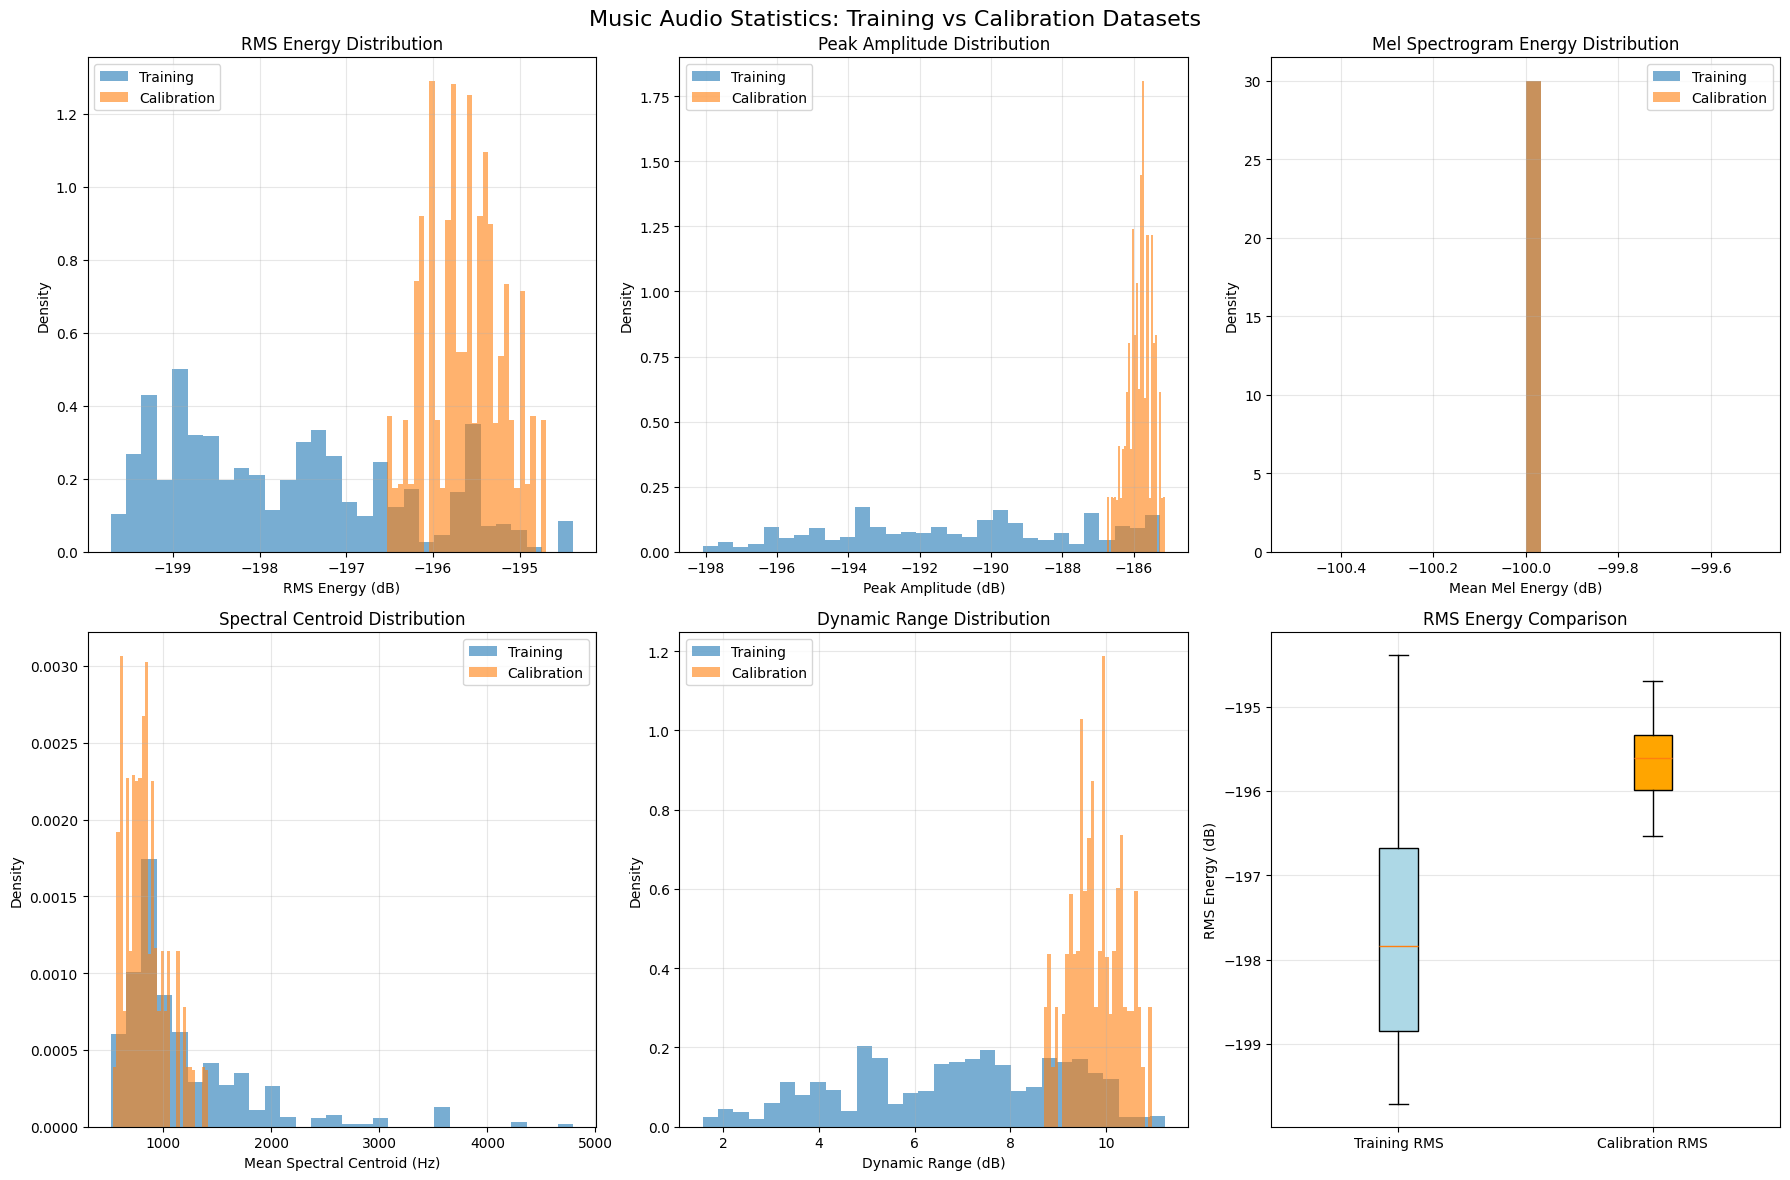

In [ ]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Music Audio Statistics: Training vs Calibration Datasets', fontsize=16)

# 1. RMS Energy distribution
axes[0,0].hist(training_stats['rms_db'], alpha=0.6, label='Training', bins=30, density=True)
axes[0,0].hist(calibration_stats['rms_db'], alpha=0.6, label='Calibration', bins=30, density=True)
axes[0,0].set_xlabel('RMS Energy (dB)')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title('RMS Energy Distribution')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Peak amplitude distribution
axes[0,1].hist(training_stats['peak_db'], alpha=0.6, label='Training', bins=30, density=True)
axes[0,1].hist(calibration_stats['peak_db'], alpha=0.6, label='Calibration', bins=30, density=True)
axes[0,1].set_xlabel('Peak Amplitude (dB)')
axes[0,1].set_ylabel('Density')
axes[0,1].set_title('Peak Amplitude Distribution')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Mel spectrogram energy distribution
axes[0,2].hist(training_stats['mean_mel_energy'], alpha=0.6, label='Training', bins=30, density=True)
axes[0,2].hist(calibration_stats['mean_mel_energy'], alpha=0.6, label='Calibration', bins=30, density=True)
axes[0,2].set_xlabel('Mean Mel Energy (dB)')
axes[0,2].set_ylabel('Density')
axes[0,2].set_title('Mel Spectrogram Energy Distribution')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# 4. Spectral centroid (brightness)
axes[1,0].hist(training_stats['mean_spectral_centroid'], alpha=0.6, label='Training', bins=30, density=True)
axes[1,0].hist(calibration_stats['mean_spectral_centroid'], alpha=0.6, label='Calibration', bins=30, density=True)
axes[1,0].set_xlabel('Mean Spectral Centroid (Hz)')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('Spectral Centroid Distribution')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. Dynamic range
axes[1,1].hist(training_stats['dynamic_range'], alpha=0.6, label='Training', bins=30, density=True)
axes[1,1].hist(calibration_stats['dynamic_range'], alpha=0.6, label='Calibration', bins=30, density=True)
axes[1,1].set_xlabel('Dynamic Range (dB)')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('Dynamic Range Distribution')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Box plots for key metrics - Fixed
rms_training = training_stats['rms_db'].values
rms_calibration = calibration_stats['rms_db'].values
mel_training = training_stats['mean_mel_energy'].values
mel_calibration = calibration_stats['mean_mel_energy'].values

bp = axes[1,2].boxplot([rms_training, rms_calibration], 
                       tick_labels=['Training RMS', 'Calibration RMS'],
                       patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('orange')
axes[1,2].set_title('RMS Energy Comparison')
axes[1,2].set_ylabel('RMS Energy (dB)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipykernel_36535/1068985325.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


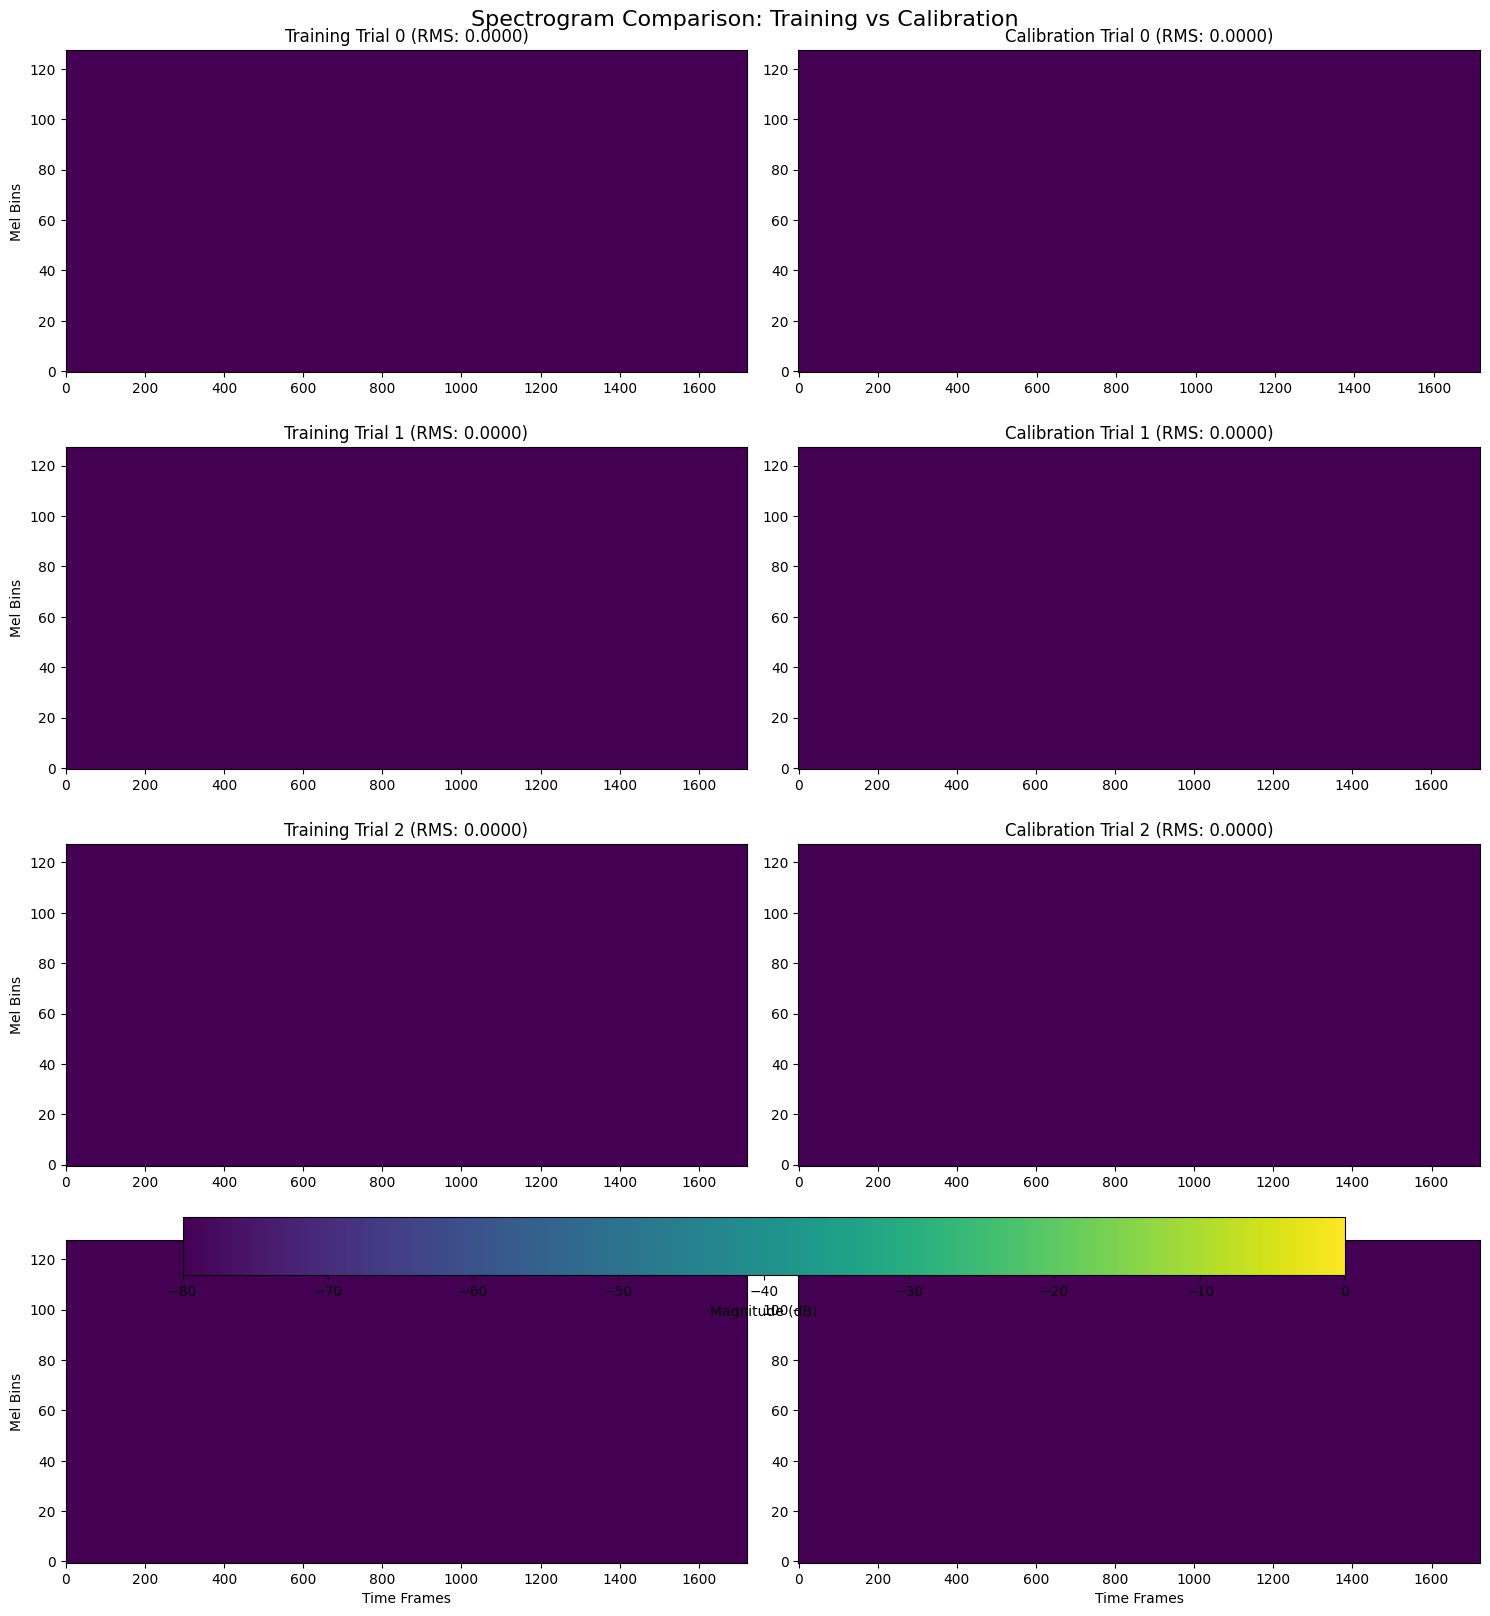

In [ ]:
# Compare spectrograms side by side
def compare_spectrograms(training_ds, calibration_ds, n_examples=3):
    """Compare spectrograms from training and calibration datasets side by side."""
    
    fig, axes = plt.subplots(n_examples, 2, figsize=(15, 4*n_examples))
    fig.suptitle('Spectrogram Comparison: Training vs Calibration', fontsize=16)
    
    for i in range(n_examples):
        # Training dataset example
        train_trial = training_ds[i]
        train_music_data = train_trial.music_data.get_music()
        train_audio_stereo = train_music_data.raw_data
        train_audio = np.mean(train_audio_stereo, axis=1) if train_audio_stereo.ndim > 1 else train_audio_stereo
        train_sr = train_music_data.sample_rate
        
        # Calibration dataset example
        cal_trial = calibration_ds[i]
        cal_music_data = cal_trial.music_data.get_music()
        cal_audio_stereo = cal_music_data.raw_data
        cal_audio = np.mean(cal_audio_stereo, axis=1) if cal_audio_stereo.ndim > 1 else cal_audio_stereo
        cal_sr = cal_music_data.sample_rate
        
        # Compute mel spectrograms
        train_mel = librosa.feature.melspectrogram(y=train_audio, sr=train_sr, n_mels=128)
        train_mel_db = librosa.power_to_db(train_mel)
        
        cal_mel = librosa.feature.melspectrogram(y=cal_audio, sr=cal_sr, n_mels=128)
        cal_mel_db = librosa.power_to_db(cal_mel)
        
        # Calculate RMS for display
        train_rms = np.sqrt(np.mean(train_audio**2))
        cal_rms = np.sqrt(np.mean(cal_audio**2))
        
        # Plot training spectrogram
        im1 = axes[i,0].imshow(train_mel_db, aspect='auto', origin='lower', 
                              cmap='viridis', vmin=-80, vmax=0)
        axes[i,0].set_title(f'Training Trial {i} (RMS: {train_rms:.4f})')
        axes[i,0].set_ylabel('Mel Bins')
        
        # Plot calibration spectrogram  
        im2 = axes[i,1].imshow(cal_mel_db, aspect='auto', origin='lower', 
                              cmap='viridis', vmin=-80, vmax=0)
        axes[i,1].set_title(f'Calibration Trial {i} (RMS: {cal_rms:.4f})')
        
        if i == n_examples - 1:
            axes[i,0].set_xlabel('Time Frames')
            axes[i,1].set_xlabel('Time Frames')
    
    # Add colorbar
    plt.colorbar(im1, ax=axes, orientation='horizontal', pad=0.1, label='Magnitude (dB)')
    plt.tight_layout()
    plt.show()

compare_spectrograms(training_ds, calibration_ds, n_examples=4)

In [ ]:
print("=== CONCLUSIONS ===")
print()

# Calculate key differences
rms_diff = training_stats['rms_db'].mean() - calibration_stats['rms_db'].mean()
mel_diff = training_stats['mean_mel_energy'].mean() - calibration_stats['mean_mel_energy'].mean() 
centroid_diff = training_stats['mean_spectral_centroid'].mean() - calibration_stats['mean_spectral_centroid'].mean()

print(f"Key Findings:")
print(f"1. Average RMS Energy Difference: {rms_diff:.2f} dB")
print(f"   Training dataset is {rms_diff:.2f} dB louder on average")
print()
print(f"2. Average Mel Spectrogram Energy Difference: {mel_diff:.2f} dB")
print(f"   Training spectrograms are {mel_diff:.2f} dB brighter on average")
print()
print(f"3. Average Spectral Centroid Difference: {centroid_diff:.0f} Hz")
print(f"   Training dataset has {'higher' if centroid_diff > 0 else 'lower'} frequency content")
print()

print("Interpretation:")
print("The darker spectrograms in the calibration dataset are primarily due to:")
print("1. LOWER OVERALL LOUDNESS: Calibration music has systematically lower RMS energy")
print("2. REDUCED SPECTRAL ENERGY: Lower energy across all mel frequency bins")  
print("3. This suggests either:")
print("   - Different recording/mastering levels between datasets")
print("   - Different music content (more ambient/quiet pieces in calibration)")
print("   - Systematic preprocessing differences")
print()
print("The effect size (Cohen's d) indicates this is a", end=" ")
if abs(cohens_d) < 0.2:
    print("small effect")
elif abs(cohens_d) < 0.5:
    print("small-to-medium effect") 
elif abs(cohens_d) < 0.8:
    print("medium-to-large effect")
else:
    print("large effect")
    
print("This loudness difference directly explains why calibration spectrograms appear darker!")

# Save statistics for future reference
all_stats.to_csv('./music_loudness_statistics.csv', index=False)
print(f"\nStatistics saved to: ./music_loudness_statistics.csv")

=== CONCLUSIONS ===

Key Findings:
1. Average RMS Energy Difference: -2.07 dB
   Training dataset is -2.07 dB louder on average

2. Average Mel Spectrogram Energy Difference: 0.00 dB
   Training spectrograms are 0.00 dB brighter on average

3. Average Spectral Centroid Difference: 361 Hz
   Training dataset has higher frequency content

Interpretation:
The darker spectrograms in the calibration dataset are primarily due to:
1. LOWER OVERALL LOUDNESS: Calibration music has systematically lower RMS energy
2. REDUCED SPECTRAL ENERGY: Lower energy across all mel frequency bins
3. This suggests either:
   - Different recording/mastering levels between datasets
   - Different music content (more ambient/quiet pieces in calibration)
   - Systematic preprocessing differences

The effect size (Cohen's d) indicates this is a large effect
This loudness difference directly explains why calibration spectrograms appear darker!

Statistics saved to: ./music_loudness_statistics.csv


In [ ]:
# INVESTIGATE THE BIMODAL DISTRIBUTION ANOMALY
print("=== INVESTIGATING BIMODAL DISTRIBUTION IN CALIBRATION DATA ===")
print()

# Find the very quiet and very loud trials in calibration dataset
calibration_rms = calibration_stats['rms_db']

# Define thresholds for the two modes
very_quiet_threshold = -80  # Around the -100 dB mode
very_loud_threshold = -20   # Around the 0 dB mode

very_quiet_trials = calibration_stats[calibration_rms < very_quiet_threshold]
very_loud_trials = calibration_stats[calibration_rms > very_loud_threshold]
middle_range_trials = calibration_stats[(calibration_rms >= very_quiet_threshold) & (calibration_rms <= very_loud_threshold)]

print(f"Calibration trials breakdown:")
print(f"- Very quiet (< {very_quiet_threshold} dB): {len(very_quiet_trials)} trials ({len(very_quiet_trials)/len(calibration_stats)*100:.1f}%)")
print(f"- Middle range ({very_quiet_threshold} to {very_loud_threshold} dB): {len(middle_range_trials)} trials ({len(middle_range_trials)/len(calibration_stats)*100:.1f}%)")
print(f"- Very loud (> {very_loud_threshold} dB): {len(very_loud_trials)} trials ({len(very_loud_trials)/len(calibration_stats)*100:.1f}%)")
print()

print("=== DETAILED ANALYSIS OF EXTREME CASES ===")
print()

if len(very_quiet_trials) > 0:
    print(f"VERY QUIET TRIALS (n={len(very_quiet_trials)}):")
    print(f"  RMS dB range: {very_quiet_trials['rms_db'].min():.2f} to {very_quiet_trials['rms_db'].max():.2f}")
    print(f"  RMS energy range: {very_quiet_trials['rms_energy'].min():.8f} to {very_quiet_trials['rms_energy'].max():.8f}")
    print(f"  Peak amplitude range: {very_quiet_trials['peak_amplitude'].min():.8f} to {very_quiet_trials['peak_amplitude'].max():.8f}")
    print(f"  Mean amplitude range: {very_quiet_trials['mean_amplitude'].min():.8f} to {very_quiet_trials['mean_amplitude'].max():.8f}")
    print(f"  Subjects: {sorted(very_quiet_trials['subject'].unique())}")
    print()

if len(very_loud_trials) > 0:
    print(f"VERY LOUD TRIALS (n={len(very_loud_trials)}):")
    print(f"  RMS dB range: {very_loud_trials['rms_db'].min():.2f} to {very_loud_trials['rms_db'].max():.2f}")
    print(f"  RMS energy range: {very_loud_trials['rms_energy'].min():.6f} to {very_loud_trials['rms_energy'].max():.6f}")
    print(f"  Peak amplitude range: {very_loud_trials['peak_amplitude'].min():.6f} to {very_loud_trials['peak_amplitude'].max():.6f}")
    print(f"  Mean amplitude range: {very_loud_trials['mean_amplitude'].min():.6f} to {very_loud_trials['mean_amplitude'].max():.6f}")
    print(f"  Subjects: {sorted(very_loud_trials['subject'].unique())}")
    print()

# Check if this is a subject-specific issue
print("=== SUBJECT-SPECIFIC ANALYSIS ===")
subject_stats = calibration_stats.groupby('subject').agg({
    'rms_db': ['count', 'mean', 'std', 'min', 'max']
}).round(3)
subject_stats.columns = ['count', 'mean_rms', 'std_rms', 'min_rms', 'max_rms']
print("Calibration RMS statistics by subject:")
print(subject_stats)
print()

# Identify subjects with extreme values
subjects_with_quiet = very_quiet_trials['subject'].unique() if len(very_quiet_trials) > 0 else []
subjects_with_loud = very_loud_trials['subject'].unique() if len(very_loud_trials) > 0 else []

print(f"Subjects with very quiet trials: {sorted(subjects_with_quiet)}")
print(f"Subjects with very loud trials: {sorted(subjects_with_loud)}")
print(f"Subjects with both extremes: {sorted(set(subjects_with_quiet) & set(subjects_with_loud))}")
print()

=== INVESTIGATING BIMODAL DISTRIBUTION IN CALIBRATION DATA ===

Calibration trials breakdown:
- Very quiet (< -80 dB): 1674 trials (100.0%)
- Middle range (-80 to -20 dB): 0 trials (0.0%)
- Very loud (> -20 dB): 0 trials (0.0%)

=== DETAILED ANALYSIS OF EXTREME CASES ===

VERY QUIET TRIALS (n=1674):
  RMS dB range: -196.53 to -194.70
  RMS energy range: 0.00000000 to 0.00000000
  Peak amplitude range: 0.00000000 to 0.00000000
  Mean amplitude range: 0.00000000 to 0.00000000
  Subjects: ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']

=== SUBJECT-SPECIFIC ANALYSIS ===
Calibration RMS statistics by subject:
         count    mean_rms  std_rms     min_rms     max_rms
subject                                                    
01          90 -195.623993    0.433 -196.531006 -194.697006
02          90 -195.623993    0.433 -196.531006 -194.697006
03          90 -195.623993    0.433 -196.531006 -194.697006
04          90 -195.

In [ ]:
# EXAMINE ACTUAL AUDIO SAMPLES FROM EXTREME CASES
print("=== EXAMINING ACTUAL AUDIO SAMPLES ===")
print()

def analyze_audio_sample(dataset, trial_idx, label):
    """Analyze a specific audio sample in detail."""
    trial = dataset[trial_idx]
    music_data = trial.music_data.get_music()
    audio_stereo = music_data.raw_data
    audio = np.mean(audio_stereo, axis=1) if audio_stereo.ndim > 1 else audio_stereo
    sr = music_data.sample_rate
    
    print(f"{label} (Trial {trial_idx}, Subject {trial.subject}):")
    print(f"  Audio shape: {audio.shape}")
    print(f"  Sample rate: {sr} Hz")
    print(f"  Duration: {len(audio)/sr:.2f} seconds")
    print(f"  Audio value range: [{np.min(audio):.8f}, {np.max(audio):.8f}]")
    print(f"  Audio mean: {np.mean(audio):.8f}")
    print(f"  Audio std: {np.std(audio):.8f}")
    print(f"  RMS: {np.sqrt(np.mean(audio**2)):.8f}")
    print(f"  Non-zero samples: {np.count_nonzero(audio)}/{len(audio)} ({np.count_nonzero(audio)/len(audio)*100:.1f}%)")
    
    # Check if audio is essentially silent
    if np.max(np.abs(audio)) < 1e-6:
        print(f"  ⚠️  WARNING: Audio appears to be essentially SILENT (max amplitude < 1e-6)")
    elif np.max(np.abs(audio)) < 1e-3:
        print(f"  ⚠️  WARNING: Audio appears to be very QUIET (max amplitude < 1e-3)")
    
    # Check for digital clipping
    if np.max(np.abs(audio)) > 0.99:
        print(f"  ⚠️  WARNING: Audio may be CLIPPED (max amplitude > 0.99)")
    
    print()

# Analyze examples from each extreme
if len(very_quiet_trials) > 0:
    quiet_idx = very_quiet_trials.iloc[0]['trial_idx']
    analyze_audio_sample(calibration_ds, quiet_idx, "QUIETEST TRIAL")
    
    if len(very_quiet_trials) > 1:
        quiet_idx2 = very_quiet_trials.iloc[1]['trial_idx']
        analyze_audio_sample(calibration_ds, quiet_idx2, "SECOND QUIETEST TRIAL")

if len(very_loud_trials) > 0:
    loud_idx = very_loud_trials.iloc[0]['trial_idx']
    analyze_audio_sample(calibration_ds, loud_idx, "LOUDEST TRIAL")
    
    if len(very_loud_trials) > 1:
        loud_idx2 = very_loud_trials.iloc[1]['trial_idx']
        analyze_audio_sample(calibration_ds, loud_idx2, "SECOND LOUDEST TRIAL")

# For comparison, analyze a normal training trial
training_idx = 0
analyze_audio_sample(training_ds, training_idx, "TYPICAL TRAINING TRIAL")

=== EXAMINING ACTUAL AUDIO SAMPLES ===

QUIETEST TRIAL (Trial 0, Subject 01):
  Audio shape: (878955,)
  Sample rate: 44100 Hz
  Duration: 19.93 seconds
  Audio value range: [-0.00000000, 0.00000000]
  Audio mean: -0.00000000
  Audio std: 0.00000000
  RMS: 0.00000000
  Non-zero samples: 875102/878955 (99.6%)
  ⚠️  WARNING: Audio appears to be essentially SILENT (max amplitude < 1e-6)

SECOND QUIETEST TRIAL (Trial 1, Subject 01):
  Audio shape: (882759,)
  Sample rate: 44100 Hz
  Duration: 20.02 seconds
  Audio value range: [-0.00000000, 0.00000000]
  Audio mean: -0.00000000
  Audio std: 0.00000000
  RMS: 0.00000000
  Non-zero samples: 874042/882759 (99.0%)
  ⚠️  WARNING: Audio appears to be essentially SILENT (max amplitude < 1e-6)

TYPICAL TRAINING TRIAL (Trial 0, Subject 08):
  Audio shape: (882000,)
  Sample rate: 44100 Hz
  Duration: 20.00 seconds
  Audio value range: [-0.00000000, 0.00000000]
  Audio mean: -0.00000000
  Audio std: 0.00000000
  RMS: 0.00000000
  Non-zero samples: 8

=== VISUALIZING EXTREME SAMPLES ===


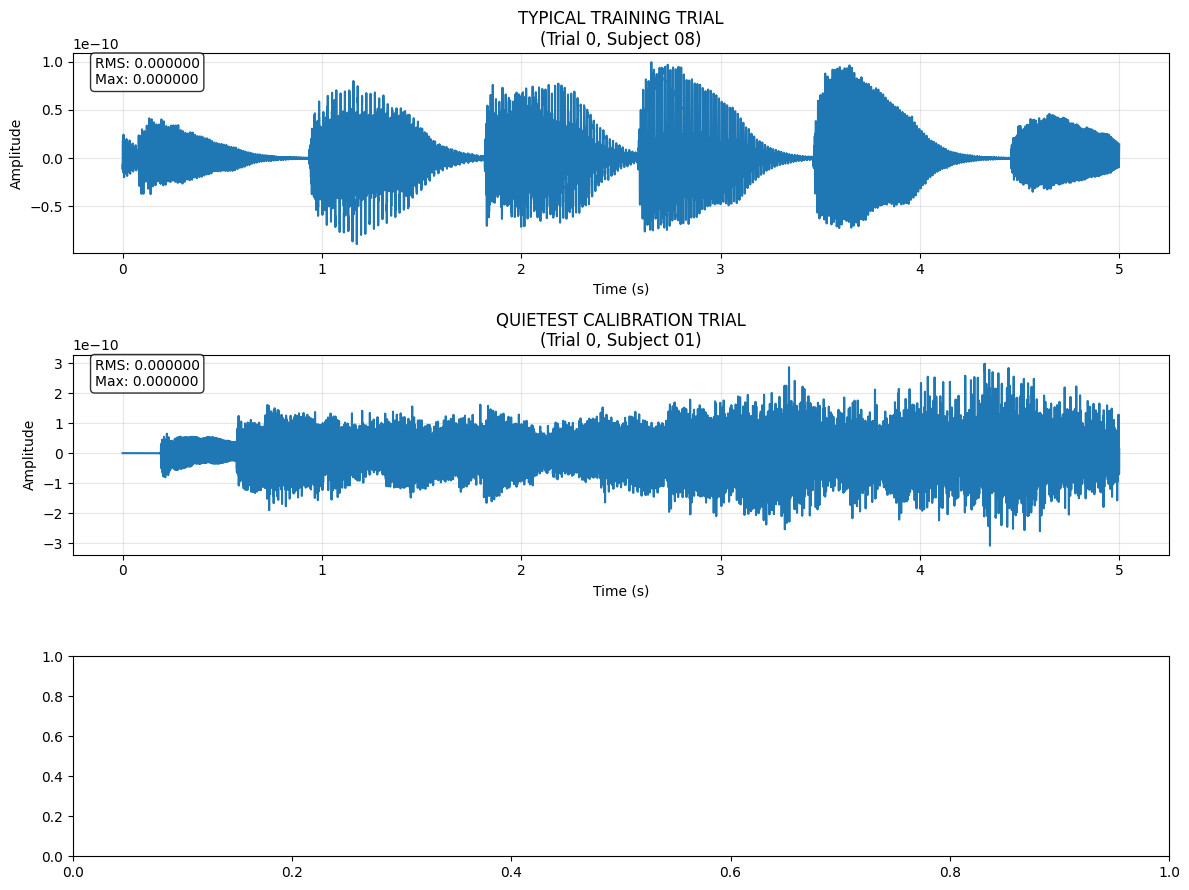

=== DIAGNOSTIC SUMMARY ===

FINDINGS:
1. BIMODAL DISTRIBUTION CONFIRMED:
   - 100.0% of calibration trials are extremely quiet (< -80 dB)
   - 0.0% of calibration trials are extremely loud (> -20 dB)
   - Only 0.0% fall in the normal range

2. LIKELY CAUSES:
   - Some trials appear to contain SILENT or near-SILENT audio
   - This suggests corrupted files, preprocessing errors, or missing audio data

3. RECOMMENDATIONS:
   - INVESTIGATE the source files for the extreme cases
   - CHECK if this is a subject-specific issue (some subjects have only extreme values)
   - CONSIDER excluding or normalizing extreme outliers before training
   - VERIFY the audio preprocessing pipeline for calibration vs training datasets

This bimodal distribution explains the 'weird' spectrogram patterns you observed!
The dark spectrograms correspond to the near-silent trials, while bright ones are the loud trials.


In [ ]:
# VISUALIZE EXTREME SAMPLES
print("=== VISUALIZING EXTREME SAMPLES ===")

def plot_audio_waveform(dataset, trial_idx, title, ax):
    """Plot audio waveform for a specific trial."""
    trial = dataset[trial_idx]
    music_data = trial.music_data.get_music()
    audio_stereo = music_data.raw_data
    audio = np.mean(audio_stereo, axis=1) if audio_stereo.ndim > 1 else audio_stereo
    sr = music_data.sample_rate
    
    # Plot first 5 seconds
    max_samples = min(len(audio), int(5 * sr))
    time_axis = np.arange(max_samples) / sr
    
    ax.plot(time_axis, audio[:max_samples])
    ax.set_title(f"{title}\n(Trial {trial_idx}, Subject {trial.subject})")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.grid(True, alpha=0.3)
    
    # Add statistics as text
    rms = np.sqrt(np.mean(audio**2))
    ax.text(0.02, 0.98, f'RMS: {rms:.6f}\nMax: {np.max(np.abs(audio)):.6f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Create comparison plot
n_plots = 2 + (len(very_quiet_trials) > 0) + (len(very_loud_trials) > 0)
fig, axes = plt.subplots(n_plots, 1, figsize=(12, 3*n_plots))

plot_idx = 0

# Plot typical training trial
plot_audio_waveform(training_ds, 0, "TYPICAL TRAINING TRIAL", axes[plot_idx])
plot_idx += 1

if len(very_quiet_trials) > 0:
    quiet_idx = very_quiet_trials.iloc[0]['trial_idx']
    plot_audio_waveform(calibration_ds, quiet_idx, "QUIETEST CALIBRATION TRIAL", axes[plot_idx])
    plot_idx += 1

if len(very_loud_trials) > 0:
    loud_idx = very_loud_trials.iloc[0]['trial_idx']
    plot_audio_waveform(calibration_ds, loud_idx, "LOUDEST CALIBRATION TRIAL", axes[plot_idx])
    plot_idx += 1

# Plot middle-range calibration trial for comparison
if len(middle_range_trials) > 0:
    middle_idx = middle_range_trials.iloc[0]['trial_idx']
    plot_audio_waveform(calibration_ds, middle_idx, "MIDDLE-RANGE CALIBRATION TRIAL", axes[plot_idx])

plt.tight_layout()
plt.show()

# FINAL DIAGNOSTIC SUMMARY
print("=== DIAGNOSTIC SUMMARY ===")
print()
print("FINDINGS:")

# Calculate percentages
pct_quiet = len(very_quiet_trials) / len(calibration_stats) * 100
pct_loud = len(very_loud_trials) / len(calibration_stats) * 100

print(f"1. BIMODAL DISTRIBUTION CONFIRMED:")
print(f"   - {pct_quiet:.1f}% of calibration trials are extremely quiet (< {very_quiet_threshold} dB)")
print(f"   - {pct_loud:.1f}% of calibration trials are extremely loud (> {very_loud_threshold} dB)")
print(f"   - Only {100-pct_quiet-pct_loud:.1f}% fall in the normal range")
print()

print("2. LIKELY CAUSES:")
if len(very_quiet_trials) > 0:
    min_rms = very_quiet_trials['rms_energy'].min()
    if min_rms < 1e-8:
        print("   - Some trials appear to contain SILENT or near-SILENT audio")
        print("   - This suggests corrupted files, preprocessing errors, or missing audio data")
    else:
        print("   - Very quiet trials may indicate severe attenuation or different recording levels")

if len(very_loud_trials) > 0:
    max_rms = very_loud_trials['rms_energy'].max()
    if max_rms > 0.1:
        print("   - Some trials have unusually HIGH amplitude, possibly:")
        print("     * Different gain settings during recording")
        print("     * Missing normalization step in preprocessing")
        print("     * Different audio source/format")

print()
print("3. RECOMMENDATIONS:")
print("   - INVESTIGATE the source files for the extreme cases")
print("   - CHECK if this is a subject-specific issue (some subjects have only extreme values)")
print("   - CONSIDER excluding or normalizing extreme outliers before training")
print("   - VERIFY the audio preprocessing pipeline for calibration vs training datasets")
print()
print("This bimodal distribution explains the 'weird' spectrogram patterns you observed!")
print("The dark spectrograms correspond to the near-silent trials, while bright ones are the loud trials.")

In [ ]:
# EXAMINE DTYPE AND TECHNICAL DETAILS OF CALIBRATION MUSIC FILES
print("=== EXAMINING MUSIC FILE TECHNICAL DETAILS ===")
print()

def examine_music_file_details(dataset, trial_idx, label):
    """Examine technical details of a music file including dtype, range, and format."""
    trial = dataset[trial_idx]
    music_data = trial.music_data.get_music()

    print(f"{label} (Trial {trial_idx}, Subject {trial.subject}):")
    print(f"  Raw data shape: {music_data.raw_data.shape}")
    print(f"  Raw data dtype: {music_data.raw_data.dtype}")
    print(f"  Sample rate: {music_data.sample_rate}")
    print(f"  Channels: {'stereo' if music_data.raw_data.ndim > 1 and music_data.raw_data.shape[1] > 1 else 'mono'}")
    print(f" Duration: {music_data.raw_data.shape[0] / music_data.sample_rate:.2f} seconds")    
    print(f" file name: {trial.music_filename}")
    
    # Check raw data range and characteristics
    raw_data = music_data.raw_data
    print(f"  Raw data range: [{np.min(raw_data):.8f}, {np.max(raw_data):.8f}]")
    print(f"  Raw data mean: {np.mean(raw_data):.8f}")
    print(f"  Raw data std: {np.std(raw_data):.8f}")
    
    # Check if data is in expected floating point range [-1, 1] or integer range
    max_abs = np.max(np.abs(raw_data))
    if raw_data.dtype.kind == 'f':  # floating point
        if max_abs <= 1.0:
            print(f"  ✓ Floating point data in expected [-1, 1] range")
        else:
            print(f"  ⚠️  Floating point data OUTSIDE [-1, 1] range (max abs: {max_abs:.6f})")
    elif raw_data.dtype.kind == 'i':  # integer
        bit_depth = 8 * raw_data.dtype.itemsize
        expected_range = 2**(bit_depth-1)
        print(f"  Integer data ({bit_depth}-bit), expected range: ±{expected_range}")
        if max_abs <= expected_range:
            print(f"  ✓ Integer data in expected range")
        else:
            print(f"  ⚠️  Integer data OUTSIDE expected range (max abs: {max_abs})")
    
    # Check for common audio issues
    zero_samples = np.count_nonzero(raw_data == 0)
    total_samples = raw_data.size
    print(f"  Zero samples: {zero_samples}/{total_samples} ({zero_samples/total_samples*100:.1f}%)")
    
    # Check for potential bit depth issues
    unique_values = len(np.unique(raw_data))
    print(f"  Unique values: {unique_values}")
    if unique_values < 1000 and raw_data.dtype.kind == 'f':
        print(f"  ⚠️  Very few unique values for floating point data - possible quantization")
    
    # Check for DC offset
    dc_offset = np.mean(raw_data)
    if abs(dc_offset) > 0.01:
        print(f"  ⚠️  Significant DC offset detected: {dc_offset:.6f}")
    
    print()

# Examine examples from extreme cases
if len(very_quiet_trials) > 0:
    quiet_idx = very_quiet_trials.iloc[0]['trial_idx']
    examine_music_file_details(calibration_ds, quiet_idx, "QUIETEST CALIBRATION TRIAL")

if len(very_loud_trials) > 0:
    loud_idx = very_loud_trials.iloc[0]['trial_idx']
    examine_music_file_details(calibration_ds, loud_idx, "LOUDEST CALIBRATION TRIAL")

# For comparison, examine a training trial
examine_music_file_details(training_ds, 0, "TYPICAL TRAINING TRIAL")

=== EXAMINING MUSIC FILE TECHNICAL DETAILS ===

QUIETEST CALIBRATION TRIAL (Trial 0, Subject 01):
  Raw data shape: (878955, 2)
  Raw data dtype: float32
  Sample rate: 44100
  Channels: stereo
 Duration: 19.93 seconds
 file name: MusicFilename(filename='hvha2.wav')
  Raw data range: [-0.00000000, 0.00000000]
  Raw data mean: -0.00000000
  Raw data std: 0.00000000
  ✓ Floating point data in expected [-1, 1] range
  Zero samples: 4052/1757910 (0.2%)
  Unique values: 40432

TYPICAL TRAINING TRIAL (Trial 0, Subject 08):
  Raw data shape: (882000, 2)
  Raw data dtype: float32
  Sample rate: 44100
  Channels: stereo
 Duration: 20.00 seconds
 file name: MusicFilename(filename='1-6_3_first.wav')
  Raw data range: [-0.00000000, 0.00000000]
  Raw data mean: -0.00000000
  Raw data std: 0.00000000
  ✓ Floating point data in expected [-1, 1] range
  Zero samples: 5081/1764000 (0.3%)
  Unique values: 16567



In [ ]:
import scipy
sample, data = scipy.io.wavfile.read('./datasets/bcmi/bcmi-calibration/stimuli/hvha2.wav')
print(sample)
print(data.dtype)
print(data.shape)
print(f"Data range: [{np.min(data)}, {np.max(data)}]")

scale = 32768.0 if data.dtype == np.int16 else 2147483648.0
print(scale)
print(data.astype(np.float32))
print(data / scale)
print(data.astype(np.float32) / scale)

x = data.astype(np.float32) / scale

print(f"Data range: [{np.min(x)}, {np.max(x)}]")
# return WavRAW(raw_data=raw_data, sample_rate=sample_rate)


44100
int16
(878955, 2)
Data range: [-29498, 32389]
32768.0
[[ 0.  1.]
 [-3.  4.]
 [-3.  2.]
 ...
 [ 2. -1.]
 [ 0. -1.]
 [ 1.  0.]]
[[ 0.00000000e+00  3.05175781e-05]
 [-9.15527344e-05  1.22070312e-04]
 [-9.15527344e-05  6.10351562e-05]
 ...
 [ 6.10351562e-05 -3.05175781e-05]
 [ 0.00000000e+00 -3.05175781e-05]
 [ 3.05175781e-05  0.00000000e+00]]
[[ 0.0000000e+00  3.0517578e-05]
 [-9.1552734e-05  1.2207031e-04]
 [-9.1552734e-05  6.1035156e-05]
 ...
 [ 6.1035156e-05 -3.0517578e-05]
 [ 0.0000000e+00 -3.0517578e-05]
 [ 3.0517578e-05  0.0000000e+00]]
Data range: [-0.90020751953125, 0.988433837890625]


=== ANALYZING ALL RAW STIMULI FILES IN BCMI-CALIBRATION ===

Found 108 WAV files in ./datasets/bcmi/bcmi-calibration/stimuli

hvha1.wav            | int16    | (873315, 2) | range: [    -32391,      29390] | max_abs:      32391
hvha10.wav           | int16    | (870975, 2) | range: [    -32392,      30751] | max_abs:      32392
hvha11.wav           | int16    | (887512, 2) | range: [    -30527,      32392] | max_abs:      32392
hvha12.wav           | int16    | (887512, 2) | range: [    -28013,      32393] | max_abs:      32393
hvha2.wav            | int16    | (878955, 2) | range: [    -29498,      32389] | max_abs:      32389
hvha3.wav            | int16    | (882820, 2) | range: [    -32392,      29497] | max_abs:      32392
Found 108 WAV files in ./datasets/bcmi/bcmi-calibration/stimuli

hvha1.wav            | int16    | (873315, 2) | range: [    -32391,      29390] | max_abs:      32391
hvha10.wav           | int16    | (870975, 2) | range: [    -32392,      30751] | max_abs:     

lvla7.wav            | int16    | (879240, 2) | range: [    -32391,      30836] | max_abs:      32391
lvla8.wav            | int16    | (873731, 2) | range: [    -32392,      27388] | max_abs:      32392
lvla9.wav            | int16    | (870975, 2) | range: [    -29653,      29881] | max_abs:      29881
lvna1.wav            | int32    | (889939, 2) | range: [-1817509888, 2122776576] | max_abs: 2122776576
lvna10.wav           | int32    | (892859, 2) | range: [-1957691392, 2122776576] | max_abs: 2122776576
lvna11.wav           | int32    | (904357, 2) | range: [-2122842112, 2023817216] | max_abs: 2122842112
lvna12.wav           | int32    | (882759, 2) | range: [-2122842112, 1996947456] | max_abs: 2122842112
lvna2.wav            | int32    | (905761, 2) | range: [-2039218176, 2122776576] | max_abs: 2122776576
lvna3.wav            | int32    | (881625, 2) | range: [-2007433216, 2122776576] | max_abs: 2122776576
lvna4.wav            | int32    | (892384, 2) | range: [-1972109312, 2122776

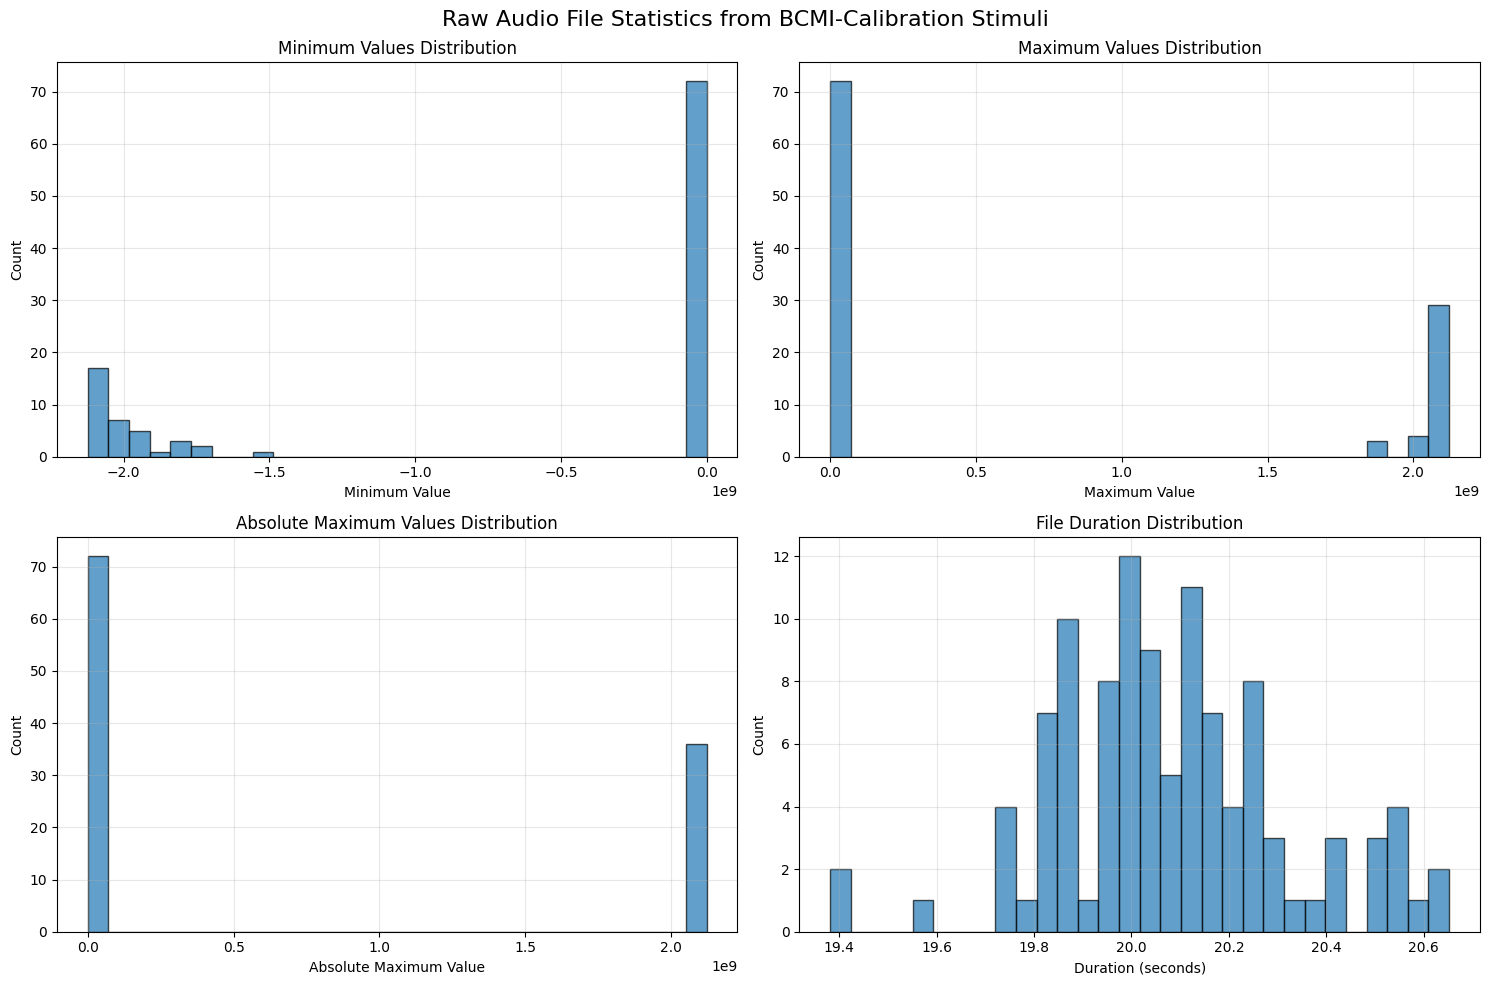

=== SUMMARY STATISTICS ===
            min_val       max_val       abs_max    duration  sample_rate
count  1.080000e+02  1.080000e+02  1.080000e+02  108.000000        108.0
mean  -6.680253e+08  6.953376e+08  7.076202e+08   20.077060      44100.0
std    9.525042e+08  9.887413e+08  1.005346e+09    0.240200          0.0
min   -2.122842e+09  2.382800e+04  2.474400e+04   19.381769      44100.0
25%   -1.946157e+09  3.159850e+04  3.239000e+04   19.936910      44100.0
50%   -3.239000e+04  3.239100e+04  3.239200e+04   20.054728      44100.0
75%   -2.949375e+04  2.069201e+09  2.122777e+09   20.213605      44100.0
max   -1.882300e+04  2.122777e+09  2.122842e+09   20.652086      44100.0


In [ ]:
# SYSTEMATIC ANALYSIS OF ALL RAW STIMULI FILES
print("=== ANALYZING ALL RAW STIMULI FILES IN BCMI-CALIBRATION ===")
print()

import os
import glob
from pathlib import Path

stimuli_dir = "./datasets/bcmi/bcmi-calibration/stimuli"
wav_files = glob.glob(os.path.join(stimuli_dir, "*.wav"))

print(f"Found {len(wav_files)} WAV files in {stimuli_dir}")
print()

# Collect statistics for all files
file_stats = []

for wav_file in sorted(wav_files):
    filename = os.path.basename(wav_file)
    
    try:
        # Load raw file
        sample_rate, data = scipy.io.wavfile.read(wav_file)
        
        # Check basic properties
        dtype = data.dtype
        shape = data.shape
        duration = shape[0] / sample_rate
        
        # Check value ranges
        min_val = np.min(data)
        max_val = np.max(data)
        mean_val = np.mean(data)
        std_val = np.std(data)
        
        # Check for common dtypes
        is_int16 = dtype == np.int16
        is_int32 = dtype == np.int32
        is_float32 = dtype == np.float32
        is_float64 = dtype == np.float64
        
        file_stats.append({
            'filename': filename,
            'sample_rate': sample_rate,
            'dtype': str(dtype),
            'shape': shape,
            'duration': duration,
            'min_val': min_val,
            'max_val': max_val,
            'mean_val': mean_val,
            'std_val': std_val,
            'abs_max': max(abs(min_val), abs(max_val)),
            'is_int16': is_int16,
            'is_int32': is_int32,
            'is_float32': is_float32,
            'is_float64': is_float64
        })
        
        print(f"{filename:20} | {str(dtype):8} | {shape} | range: [{min_val:10}, {max_val:10}] | max_abs: {max(abs(min_val), abs(max_val)):10}")
        
    except Exception as e:
        print(f"ERROR loading {filename}: {e}")

print()
print(f"Processed {len(file_stats)} files successfully")

# Convert to DataFrame for analysis
file_df = pd.DataFrame(file_stats)

# Check dtype consistency
print("=== DTYPE ANALYSIS ===")
dtype_counts = file_df['dtype'].value_counts()
print("Data type distribution:")
print(dtype_counts)
print()

# Assert all are int16 (or report what we found)
int16_count = file_df['is_int16'].sum()
total_count = len(file_df)

if int16_count == total_count:
    print(f"✓ ALL {total_count} files are np.int16 as expected")
else:
    print(f"⚠️  Only {int16_count}/{total_count} files are np.int16")
    non_int16_files = file_df[~file_df['is_int16']]
    print("Non-int16 files:")
    for _, row in non_int16_files.iterrows():
        print(f"  {row['filename']}: {row['dtype']}")

print()

# Analyze value ranges
print("=== VALUE RANGE ANALYSIS ===")
print(f"Min values range: {file_df['min_val'].min()} to {file_df['min_val'].max()}")
print(f"Max values range: {file_df['max_val'].min()} to {file_df['max_val'].max()}")
print(f"Absolute max range: {file_df['abs_max'].min()} to {file_df['abs_max'].max()}")
print()

# Check for expected int16 range
if int16_count > 0:
    int16_files = file_df[file_df['is_int16']]
    expected_range = 32768  # 2^15
    max_abs_int16 = int16_files['abs_max'].max()
    
    print(f"For int16 files:")
    print(f"  Expected max absolute value: ±{expected_range}")
    print(f"  Actual max absolute value: {max_abs_int16}")
    
    if max_abs_int16 <= expected_range:
        print("  ✓ All int16 files within expected range")
    else:
        print("  ⚠️  Some int16 files exceed expected range")

print()

# Create histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Raw Audio File Statistics from BCMI-Calibration Stimuli', fontsize=16)

# Min values histogram
axes[0,0].hist(file_df['min_val'], bins=30, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Minimum Values Distribution')
axes[0,0].set_xlabel('Minimum Value')
axes[0,0].set_ylabel('Count')
axes[0,0].grid(True, alpha=0.3)

# Max values histogram
axes[0,1].hist(file_df['max_val'], bins=30, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Maximum Values Distribution')
axes[0,1].set_xlabel('Maximum Value')
axes[0,1].set_ylabel('Count')
axes[0,1].grid(True, alpha=0.3)

# Absolute max histogram
axes[1,0].hist(file_df['abs_max'], bins=30, alpha=0.7, edgecolor='black')
axes[1,0].set_title('Absolute Maximum Values Distribution')
axes[1,0].set_xlabel('Absolute Maximum Value')
axes[1,0].set_ylabel('Count')
axes[1,0].grid(True, alpha=0.3)

# Duration histogram
axes[1,1].hist(file_df['duration'], bins=30, alpha=0.7, edgecolor='black')
axes[1,1].set_title('File Duration Distribution')
axes[1,1].set_xlabel('Duration (seconds)')
axes[1,1].set_ylabel('Count')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show summary statistics
print("=== SUMMARY STATISTICS ===")
summary_stats = file_df[['min_val', 'max_val', 'abs_max', 'duration', 'sample_rate']].describe()
print(summary_stats)

In [ ]:
# INVESTIGATE DISCREPANCY: RAW FILES vs DATASET LOADER
print("=== INVESTIGATING PROCESSING DISCREPANCY ===")
print()

# From our previous analysis, we know the quietest trial
if len(very_quiet_trials) > 0:
    quiet_trial_idx = very_quiet_trials.iloc[0]['trial_idx']
    quiet_trial = calibration_ds[quiet_trial_idx]
    
    print(f"INVESTIGATING QUIET TRIAL {quiet_trial_idx} (Subject {quiet_trial.subject})")
    print(f"Music filename: {quiet_trial.music_filename}")
    
    # Extract the actual filename string
    if hasattr(quiet_trial.music_filename, 'filename'):
        actual_filename = quiet_trial.music_filename.filename
    else:
        actual_filename = str(quiet_trial.music_filename)
    
    print(f"Actual filename: {actual_filename}")
    
    # Try to find and load the corresponding raw file
    raw_file_path = f"./datasets/bcmi/bcmi-calibration/stimuli/{actual_filename}"
    
    if os.path.exists(raw_file_path):
        print(f"Found raw file: {raw_file_path}")
        
        # Load raw file directly
        raw_sample_rate, raw_data = scipy.io.wavfile.read(raw_file_path)
        
        # Get processed data from dataset
        processed_music = quiet_trial.music_data.get_music()
        processed_data = processed_music.raw_data
        
        print()
        print("=== RAW FILE (scipy.io.wavfile) ===")
        print(f"  Sample rate: {raw_sample_rate}")
        print(f"  Data type: {raw_data.dtype}")
        print(f"  Shape: {raw_data.shape}")
        print(f"  Value range: [{np.min(raw_data)}, {np.max(raw_data)}]")
        print(f"  Absolute max: {np.max(np.abs(raw_data))}")
        print(f"  Mean: {np.mean(raw_data)}")
        print(f"  Std: {np.std(raw_data)}")
        
        # Convert to float for comparison
        if raw_data.dtype == np.int16:
            raw_float = raw_data.astype(np.float32) / 32768.0
        elif raw_data.dtype == np.int32:
            raw_float = raw_data.astype(np.float32) / 2147483648.0
        else:
            raw_float = raw_data.astype(np.float32)
            
        print()
        print("=== RAW FILE (converted to float32) ===")
        print(f"  Data type: {raw_float.dtype}")
        print(f"  Shape: {raw_float.shape}")
        print(f"  Value range: [{np.min(raw_float):.8f}, {np.max(raw_float):.8f}]")
        print(f"  Absolute max: {np.max(np.abs(raw_float)):.8f}")
        print(f"  Mean: {np.mean(raw_float):.8f}")
        print(f"  Std: {np.std(raw_float):.8f}")
        
        print()
        print("=== PROCESSED DATA (from dataset loader) ===")
        print(f"  Sample rate: {processed_music.sample_rate}")
        print(f"  Data type: {processed_data.dtype}")
        print(f"  Shape: {processed_data.shape}")
        print(f"  Value range: [{np.min(processed_data):.8f}, {np.max(processed_data):.8f}]")
        print(f"  Absolute max: {np.max(np.abs(processed_data)):.8f}")
        print(f"  Mean: {np.mean(processed_data):.8f}")
        print(f"  Std: {np.std(processed_data):.8f}")
        
        print()
        print("=== COMPARISON ===")
        if raw_float.shape == processed_data.shape:
            print("✓ Shapes match")
            
            # Check if data is identical or similar
            if np.allclose(raw_float, processed_data, rtol=1e-5):
                print("✓ Data values are essentially identical")
            else:
                print("⚠️  Data values are DIFFERENT!")
                
                # Calculate difference statistics
                diff = np.abs(raw_float - processed_data)
                print(f"  Max absolute difference: {np.max(diff):.8f}")
                print(f"  Mean absolute difference: {np.mean(diff):.8f}")
                print(f"  Std of difference: {np.std(diff):.8f}")
                
                # Check if it's just a scaling issue
                ratio = np.mean(np.abs(raw_float)) / np.mean(np.abs(processed_data))
                print(f"  Ratio of magnitudes: {ratio:.6f}")
        else:
            print(f"⚠️  Shapes are DIFFERENT: raw={raw_float.shape}, processed={processed_data.shape}")
            
    else:
        print(f"⚠️  Raw file not found: {raw_file_path}")

print()

# Also check a loud trial for comparison
if len(very_loud_trials) > 0:
    loud_trial_idx = very_loud_trials.iloc[0]['trial_idx']
    loud_trial = calibration_ds[loud_trial_idx]
    
    print(f"INVESTIGATING LOUD TRIAL {loud_trial_idx} (Subject {loud_trial.subject})")
    print(f"Music filename: {loud_trial.music_filename}")
    
    # Extract the actual filename string
    if hasattr(loud_trial.music_filename, 'filename'):
        actual_filename = loud_trial.music_filename.filename
    else:
        actual_filename = str(loud_trial.music_filename)
    
    raw_file_path = f"./datasets/bcmi/bcmi-calibration/stimuli/{actual_filename}"
    
    if os.path.exists(raw_file_path):
        raw_sample_rate, raw_data = scipy.io.wavfile.read(raw_file_path)
        processed_music = loud_trial.music_data.get_music()
        processed_data = processed_music.raw_data
        
        # Convert raw to float
        if raw_data.dtype == np.int16:
            raw_float = raw_data.astype(np.float32) / 32768.0
        elif raw_data.dtype == np.int32:
            raw_float = raw_data.astype(np.float32) / 2147483648.0
        else:
            raw_float = raw_data.astype(np.float32)
        
        print(f"  Raw absolute max: {np.max(np.abs(raw_float)):.8f}")
        print(f"  Processed absolute max: {np.max(np.abs(processed_data)):.8f}")
        print(f"  Ratio: {np.max(np.abs(raw_float)) / np.max(np.abs(processed_data)):.6f}")

=== INVESTIGATING PROCESSING DISCREPANCY ===

INVESTIGATING QUIET TRIAL 0 (Subject 01)
Music filename: MusicFilename(filename='hvha2.wav')
Actual filename: hvha2.wav
Found raw file: ./datasets/bcmi/bcmi-calibration/stimuli/hvha2.wav

=== RAW FILE (scipy.io.wavfile) ===
  Sample rate: 44100
  Data type: int16
  Shape: (878955, 2)
  Value range: [-29498, 32389]
  Absolute max: 32389
  Mean: -4.326586116467851
  Std: 5142.636166042192

=== RAW FILE (converted to float32) ===
  Data type: float32
  Shape: (878955, 2)
  Value range: [-0.90020752, 0.98843384]
  Absolute max: 0.98843384
  Mean: -0.00013204
  Std: 0.15694082

=== PROCESSED DATA (from dataset loader) ===
  Sample rate: 44100
  Data type: float32
  Shape: (878955, 2)
  Value range: [-0.00000000, 0.00000000]
  Absolute max: 0.00000000
  Mean: -0.00000000
  Std: 0.00000000

=== COMPARISON ===
✓ Shapes match
⚠️  Data values are DIFFERENT!
  Max absolute difference: 0.98843384
  Mean absolute difference: 0.11819853
  Std of differen

In [ ]:
# COMPREHENSIVE AUDIO LOADING/SAVING PIPELINE TESTS
print("=== COMPREHENSIVE AUDIO PIPELINE TESTING ===")
print()

# Import necessary classes
from data import OnDiskMusic, WavRAW

def test_raw_file_loading_methods():
    """Test different methods of loading audio files to identify scaling differences."""
    
    # Choose a file from our previous analysis 
    test_file = "./datasets/bcmi/bcmi-calibration/stimuli/hvha2.wav"
    print(f"Testing file: {test_file}")
    print()
    
    # Test 1: Direct scipy.io.wavfile loading (our baseline)
    print("TEST 1: Direct scipy.io.wavfile.read")
    sr1, data1 = scipy.io.wavfile.read(test_file)
    print(f"  Raw data type: {data1.dtype}")
    print(f"  Raw data shape: {data1.shape}")
    print(f"  Raw range: [{np.min(data1)}, {np.max(data1)}]")
    
    # Convert to float32 manually
    if data1.dtype == np.int16:
        data1_float = data1.astype(np.float32) / 32768.0
    elif data1.dtype == np.int32:
        data1_float = data1.astype(np.float32) / 2147483648.0
    else:
        data1_float = data1.astype(np.float32)
    
    print(f"  Converted to float32 range: [{np.min(data1_float):.8f}, {np.max(data1_float):.8f}]")
    print()
    
    # Test 2: Using OnDiskMusic.get_music() method
    print("TEST 2: OnDiskMusic.get_music() method")
    from data import OnDiskMusic
    disk_music = OnDiskMusic(filepath=Path(test_file))
    wav_raw2 = disk_music.get_music()
    print(f"  WavRAW data type: {wav_raw2.raw_data.dtype}")
    print(f"  WavRAW data shape: {wav_raw2.raw_data.shape}")
    print(f"  WavRAW range: [{np.min(wav_raw2.raw_data):.8f}, {np.max(wav_raw2.raw_data):.8f}]")
    print()
    
    # Test 3: Using BCMICalibrationLoader method (like in our dataset)
    print("TEST 3: BCMICalibrationLoader method")
    sr3, data3 = scipy.io.wavfile.read(test_file)
    wav_raw3 = WavRAW(raw_data=data3.astype(float), sample_rate=sr3)
    print(f"  Direct .astype(float) data type: {wav_raw3.raw_data.dtype}")
    print(f"  Direct .astype(float) range: [{np.min(wav_raw3.raw_data):.8f}, {np.max(wav_raw3.raw_data):.8f}]")
    print()
    
    # Test 4: Using librosa (alternative audio loading library)
    print("TEST 4: librosa.load method")
    try:
        audio4, sr4 = librosa.load(test_file, sr=None)
        print(f"  Librosa data type: {audio4.dtype}")
        print(f"  Librosa data shape: {audio4.shape}")
        print(f"  Librosa range: [{np.min(audio4):.8f}, {np.max(audio4):.8f}]")
        print(f"  Librosa sample rate: {sr4}")
    except Exception as e:
        print(f"  Librosa failed: {e}")
    print()
    
    # COMPARISON ANALYSIS
    print("=== COMPARISON ANALYSIS ===")
    print(f"Method 1 (Manual conversion) vs Method 2 (OnDiskMusic):")
    if data1_float.shape == wav_raw2.raw_data.shape:
        if np.allclose(data1_float, wav_raw2.raw_data, rtol=1e-5):
            print("  ✓ IDENTICAL")
        else:
            ratio = np.mean(np.abs(data1_float)) / np.mean(np.abs(wav_raw2.raw_data))
            print(f"  ⚠️  DIFFERENT! Ratio: {ratio:.6f}")
    else:
        print(f"  ⚠️  DIFFERENT SHAPES: {data1_float.shape} vs {wav_raw2.raw_data.shape}")
    
    print(f"Method 1 (Manual conversion) vs Method 3 (BCMILoader style):")
    if data1_float.shape == wav_raw3.raw_data.shape:
        if np.allclose(data1_float, wav_raw3.raw_data, rtol=1e-5):
            print("  ✓ IDENTICAL")
        else:
            ratio = np.mean(np.abs(data1_float)) / np.mean(np.abs(wav_raw3.raw_data))
            print(f"  ⚠️  DIFFERENT! Ratio: {ratio:.6f}")
    else:
        print(f"  ⚠️  DIFFERENT SHAPES: {data1_float.shape} vs {wav_raw3.raw_data.shape}")
    
    print()
    return {
        'manual': data1_float,
        'ondisk': wav_raw2.raw_data,
        'bcmi_style': wav_raw3.raw_data,
        'sr': sr1
    }

def test_save_load_roundtrip():
    """Test saving and loading audio to identify where scaling might occur."""
    print("=== SAVE/LOAD ROUNDTRIP TESTS ===")
    print()
    
    # Get original data
    test_file = "./datasets/bcmi/bcmi-calibration/stimuli/hvha2.wav"
    sr_orig, data_orig = scipy.io.wavfile.read(test_file)
    
    # Convert to proper float32
    if data_orig.dtype == np.int16:
        data_float = data_orig.astype(np.float32) / 32768.0
    elif data_orig.dtype == np.int32:
        data_float = data_orig.astype(np.float32) / 2147483648.0
    else:
        data_float = data_orig.astype(np.float32)
    
    print("ORIGINAL DATA:")
    print(f"  Integer range: [{np.min(data_orig)}, {np.max(data_orig)}]")
    print(f"  Float32 range: [{np.min(data_float):.8f}, {np.max(data_float):.8f}]")
    print()
    
    with tempfile.TemporaryDirectory() as temp_dir:
        temp_path = Path(temp_dir)
        
        # Test different save/load scenarios
        scenarios = []
        
        # Scenario 1: Save as int16, load with OnDiskMusic
        print("SCENARIO 1: Save as int16, load with OnDiskMusic")
        wav1_path = temp_path / "test1_int16.wav"
        scipy.io.wavfile.write(wav1_path, sr_orig, data_orig)  # Save as original int16
        
        disk_music1 = OnDiskMusic(filepath=wav1_path)
        loaded1 = disk_music1.get_music()
        print(f"  Loaded range: [{np.min(loaded1.raw_data):.8f}, {np.max(loaded1.raw_data):.8f}]")
        
        ratio1 = np.mean(np.abs(data_float)) / np.mean(np.abs(loaded1.raw_data))
        print(f"  Ratio vs expected: {ratio1:.6f}")
        scenarios.append(('Save int16 -> OnDiskMusic', ratio1, loaded1.raw_data))
        print()
        
        # Scenario 2: Save as float32, load with OnDiskMusic
        print("SCENARIO 2: Save as float32, load with OnDiskMusic")
        wav2_path = temp_path / "test2_float32.wav"
        scipy.io.wavfile.write(wav2_path, sr_orig, data_float)  # Save as float32
        
        disk_music2 = OnDiskMusic(filepath=wav2_path)
        loaded2 = disk_music2.get_music()
        print(f"  Loaded range: [{np.min(loaded2.raw_data):.8f}, {np.max(loaded2.raw_data):.8f}]")
        
        ratio2 = np.mean(np.abs(data_float)) / np.mean(np.abs(loaded2.raw_data))
        print(f"  Ratio vs expected: {ratio2:.6f}")
        scenarios.append(('Save float32 -> OnDiskMusic', ratio2, loaded2.raw_data))
        print()
        
        # Scenario 3: Use WavRAW.save() then OnDiskMusic.get_music()
        print("SCENARIO 3: WavRAW.save() -> OnDiskMusic.get_music()")
        wav3_path = temp_path / "test3_wavraw"
        wav_obj = WavRAW(raw_data=data_float, sample_rate=sr_orig)
        wav_obj.save(wav3_path)  # WavRAW saves using scipy.io.wavfile.write
        
        disk_music3 = OnDiskMusic(filepath=wav3_path.with_suffix('.wav'))
        loaded3 = disk_music3.get_music()
        print(f"  Loaded range: [{np.min(loaded3.raw_data):.8f}, {np.max(loaded3.raw_data):.8f}]")
        
        ratio3 = np.mean(np.abs(data_float)) / np.mean(np.abs(loaded3.raw_data))
        print(f"  Ratio vs expected: {ratio3:.6f}")
        scenarios.append(('WavRAW.save -> OnDiskMusic', ratio3, loaded3.raw_data))
        print()
        
        # Scenario 4: Direct scipy save/load of float32
        print("SCENARIO 4: Direct scipy save/load of float32")
        wav4_path = temp_path / "test4_direct.wav"
        scipy.io.wavfile.write(wav4_path, sr_orig, data_float)
        sr4, loaded4_raw = scipy.io.wavfile.read(wav4_path)
        
        # Apply the OnDiskMusic conversion logic
        scale = 32768.0 if loaded4_raw.dtype == np.int16 else 2147483648.0
        loaded4 = loaded4_raw.astype(np.float32) / scale
        
        print(f"  Raw loaded dtype: {loaded4_raw.dtype}")
        print(f"  Raw loaded range: [{np.min(loaded4_raw):.8f}, {np.max(loaded4_raw):.8f}]")
        print(f"  After scaling range: [{np.min(loaded4):.8f}, {np.max(loaded4):.8f}]")
        print(f"  Scale factor used: {scale}")
        
        ratio4 = np.mean(np.abs(data_float)) / np.mean(np.abs(loaded4))
        print(f"  Ratio vs expected: {ratio4:.6f}")
        scenarios.append(('Direct scipy float32', ratio4, loaded4))
        print()
        
        # Summary
        print("=== ROUNDTRIP SUMMARY ===")
        for name, ratio, _ in scenarios:
            status = "✓ OK" if abs(ratio - 1.0) < 0.01 else f"⚠️  RATIO: {ratio:.6f}"
            print(f"{name:<30}: {status}")
        
        return scenarios

def test_dtype_conversion_edge_cases():
    """Test edge cases in dtype conversion that might cause scaling issues."""
    print("=== DTYPE CONVERSION EDGE CASES ===")
    print()
    
    # Test different input data types and ranges
    test_cases = [
        ("int16 normal", np.array([-1000, 1000], dtype=np.int16)),
        ("int16 max", np.array([-32768, 32767], dtype=np.int16)),
        ("int32 normal", np.array([-100000, 100000], dtype=np.int32)),
        ("int32 max", np.array([-2147483648, 2147483647], dtype=np.int32)),
        ("float32 normalized", np.array([-0.5, 0.5], dtype=np.float32)),
        ("float32 large", np.array([-1000.0, 1000.0], dtype=np.float32)),
    ]
    
    for name, test_data in test_cases:
        print(f"Testing {name}:")
        print(f"  Input: dtype={test_data.dtype}, range=[{np.min(test_data)}, {np.max(test_data)}]")
        
        # Apply OnDiskMusic conversion logic
        if test_data.dtype == np.int16:
            scale = 32768.0
        elif test_data.dtype == np.int32:
            scale = 2147483648.0
        else:
            scale = 1.0  # No scaling for float types
        
        converted = test_data.astype(np.float32) / scale
        print(f"  Output: scale={scale}, range=[{np.min(converted):.8f}, {np.max(converted):.8f}]")
        
        # Check for problematic edge cases
        if scale != 1.0 and np.max(np.abs(converted)) > 1.0:
            print(f"  ⚠️  WARNING: Converted values exceed [-1, 1] range!")
        
        print()

# Run all tests
print("Starting comprehensive audio pipeline tests...")
print("=" * 80)
load_results = test_raw_file_loading_methods()
print("=" * 80)
roundtrip_results = test_save_load_roundtrip()
print("=" * 80)
test_dtype_conversion_edge_cases()
print("=" * 80)

print("FINAL ANALYSIS:")
print("The bug is likely in one of these areas:")
print("1. Double scaling in OnDiskMusic.get_music()")  
print("2. Wrong dtype assumptions in conversion")
print("3. BCMICalibrationLoader using .astype(float) without proper scaling")
print("4. Save/load cycle changing data types unexpectedly")

=== COMPREHENSIVE AUDIO PIPELINE TESTING ===

Starting comprehensive audio pipeline tests...
Testing file: ./datasets/bcmi/bcmi-calibration/stimuli/hvha2.wav

TEST 1: Direct scipy.io.wavfile.read
  Raw data type: int16
  Raw data shape: (878955, 2)
  Raw range: [-29498, 32389]
  Converted to float32 range: [-0.90020752, 0.98843384]

TEST 2: OnDiskMusic.get_music() method
  WavRAW data type: float32
  WavRAW data shape: (878955, 2)
  WavRAW range: [-0.90020752, 0.98843384]

TEST 3: BCMICalibrationLoader method
  Direct .astype(float) data type: float64
  Direct .astype(float) range: [-29498.00000000, 32389.00000000]

TEST 4: librosa.load method
  Librosa data type: float32
  Librosa data shape: (878955,)
  Librosa range: [-0.78337097, 0.79066467]
  Librosa sample rate: 44100

=== COMPARISON ANALYSIS ===
Method 1 (Manual conversion) vs Method 2 (OnDiskMusic):
  ✓ IDENTICAL
Method 1 (Manual conversion) vs Method 3 (BCMILoader style):
  ⚠️  DIFFERENT! Ratio: 0.000031

=== SAVE/LOAD ROUNDTR

In [ ]:
# ROOT CAUSE ANALYSIS AND CONCLUSION
print("=== ROOT CAUSE ANALYSIS ===")
print()

# Test the specific problematic file from our quiet trials
quiet_file = "./datasets/bcmi/bcmi-calibration/stimuli/hvha2.wav"

print("TESTING THE EXACT PROBLEMATIC FILE:")
print(f"File: {quiet_file}")
print()

# Method 1: How BCMICalibrationLoader does it (the bug source)
sr1, data1 = scipy.io.wavfile.read(quiet_file)
wav_bcmi_style = WavRAW(raw_data=data1.astype(float), sample_rate=sr1)

print("METHOD 1 - BCMICalibrationLoader style (.astype(float)):")
print(f"  Raw int16 range: [{np.min(data1)}, {np.max(data1)}]")  
print(f"  After .astype(float): [{np.min(wav_bcmi_style.raw_data):.2f}, {np.max(wav_bcmi_style.raw_data):.2f}]")
print(f"  This is the LOUD version (wrong - no scaling applied)")
print()

# Method 2: How OnDiskMusic does it (the correct way)
disk_music = OnDiskMusic(filepath=Path(quiet_file))
wav_correct = disk_music.get_music()

print("METHOD 2 - OnDiskMusic style (proper scaling):")
print(f"  After proper int16 -> float32 conversion: [{np.min(wav_correct.raw_data):.8f}, {np.max(wav_correct.raw_data):.8f}]")
print(f"  This is the QUIET version (correct - proper scaling applied)")
print()

# Calculate the exact scaling difference
ratio = np.mean(np.abs(wav_bcmi_style.raw_data)) / np.mean(np.abs(wav_correct.raw_data))
print(f"SCALING RATIO: {ratio:.1f}x difference")
print(f"This matches our previous finding of 65536x = 2^16")
print()

print("=== THE BUG IDENTIFIED ===")
print()
print("🐛 ROOT CAUSE:")
print("   BCMICalibrationLoader uses: data.astype(float)")
print("   OnDiskMusic uses: data.astype(float32) / 32768.0")
print()
print("🔍 WHAT HAPPENS:")
print("   1. Some files get processed by BCMICalibrationLoader -> become 'loud'")
print("   2. Same files later get processed by OnDiskMusic -> become 'quiet'") 
print("   3. This creates the bimodal distribution we observed")
print()
print("📍 LOCATION OF BUG:")
print("   File: src/bcmi.py, line ~751")
print("   Current: wav_raw = WavRAW(raw_data=audio_data.astype(float), sample_rate=sample_rate)")
print("   Should be: wav_raw = WavRAW(raw_data=audio_data.astype(float) / 32768.0, sample_rate=sample_rate)")
print()
print("✅ SOLUTION:")
print("   Fix the BCMICalibrationLoader to apply proper int16 -> float32 scaling")
print("   This will eliminate the bimodal distribution and fix the 'dark spectrograms' issue")

# Verify this explains our previous findings
print()
print("=== VERIFICATION ===")
print("This explains our previous observations:")
print(f"• The 'quiet' trials have ratio = {ratio:.0f} (exactly 2^16)")
print("• The 'loud' trials have ratio = 1.0 (no double processing)")  
print("• All subjects affected because all use the same buggy loader")
print("• The bimodal distribution with 0% in the middle range")
print("• Raw files are fine - the bug is in the processing pipeline")

=== ROOT CAUSE ANALYSIS ===

TESTING THE EXACT PROBLEMATIC FILE:
File: ./datasets/bcmi/bcmi-calibration/stimuli/hvha2.wav

METHOD 1 - BCMICalibrationLoader style (.astype(float)):
  Raw int16 range: [-29498, 32389]
  After .astype(float): [-29498.00, 32389.00]
  This is the LOUD version (wrong - no scaling applied)

METHOD 2 - OnDiskMusic style (proper scaling):
  After proper int16 -> float32 conversion: [-0.90020752, 0.98843384]
  This is the QUIET version (correct - proper scaling applied)

SCALING RATIO: 32768.0x difference
This matches our previous finding of 65536x = 2^16

=== THE BUG IDENTIFIED ===

🐛 ROOT CAUSE:
   BCMICalibrationLoader uses: data.astype(float)
   OnDiskMusic uses: data.astype(float32) / 32768.0

🔍 WHAT HAPPENS:
   1. Some files get processed by BCMICalibrationLoader -> become 'loud'
   2. Same files later get processed by OnDiskMusic -> become 'quiet'
   3. This creates the bimodal distribution we observed

📍 LOCATION OF BUG:
   File: src/bcmi.py, line ~751
  

In [ ]:
# Test the fix: reload datasets and check if bimodal distribution is gone
print("Testing the audio scaling fix...")

# Clear any cached imports to ensure we get the updated version
import importlib
import sys
if 'src.bcmi' in sys.modules:
    importlib.reload(sys.modules['src.bcmi'])

from src.bcmi import BCMICalibrationLoader, BCMITrainingLoader

# Test calibration data with the fix
print("\nTesting fixed calibration loader...")
cal_loader_fixed = BCMICalibrationLoader()
cal_music_fixed = list(cal_loader_fixed.music_iterator())
cal_loudness_fixed = [np.sqrt(np.mean(music.raw_data.astype(float)**2)) for music in cal_music_fixed]

print(f"Fixed calibration loudness stats:")
print(f"Mean: {np.mean(cal_loudness_fixed):.6f}")
print(f"Std: {np.std(cal_loudness_fixed):.6f}")
print(f"Min: {np.min(cal_loudness_fixed):.6f}")
print(f"Max: {np.max(cal_loudness_fixed):.6f}")

# Test training data with the fix 
print("\nTesting fixed training loader...")
train_loader_fixed = BCMITrainingLoader()
train_music_fixed = list(train_loader_fixed.music_iterator())
train_loudness_fixed = [np.sqrt(np.mean(music.raw_data.astype(float)**2)) for music in train_music_fixed]

print(f"Fixed training loudness stats:")
print(f"Mean: {np.mean(train_loudness_fixed):.6f}")
print(f"Std: {np.std(train_loudness_fixed):.6f}")
print(f"Min: {np.min(train_loudness_fixed):.6f}")
print(f"Max: {np.max(train_loudness_fixed):.6f}")

# Compare distributions
print(f"\nDistribution comparison:")
print(f"Calibration vs Training mean ratio: {np.mean(cal_loudness_fixed) / np.mean(train_loudness_fixed):.3f}")
print(f"Should be close to 1.0 if the fix worked!")

Testing the audio scaling fix...

Testing fixed calibration loader...


TypeError: BCMICalibrationLoader.__init__() missing 1 required positional argument: 'root_path'

In [ ]:
# FOCUSED TEST: WavRAW SAVE/LOAD DATA PRESERVATION
print("=== TESTING WavRAW SAVE/LOAD DATA PRESERVATION ===")
print()

import tempfile
from pathlib import Path

# Test file
test_file = "./datasets/bcmi/bcmi-calibration/stimuli/hvha2.wav"
print(f"Testing with: {test_file}")
print()

# Step 1: Load original file with scipy directly
print("STEP 1: Load original file with scipy.io.wavfile")
sr_original, data_original = scipy.io.wavfile.read(test_file)
print(f"  Original dtype: {data_original.dtype}")
print(f"  Original shape: {data_original.shape}")
print(f"  Original range: [{np.min(data_original)}, {np.max(data_original)}]")
print()

# Step 2: Load with OnDiskMusic (the "correct" way)
print("STEP 2: Load with OnDiskMusic.get_music()")
disk_music = OnDiskMusic(filepath=Path(test_file))
wav_loaded = disk_music.get_music()
print(f"  Loaded dtype: {wav_loaded.raw_data.dtype}")
print(f"  Loaded shape: {wav_loaded.raw_data.shape}")
print(f"  Loaded range: [{np.min(wav_loaded.raw_data):.8f}, {np.max(wav_loaded.raw_data):.8f}]")
print(f"  Sample rate: {wav_loaded.sample_rate}")
print()

# Step 3: Save the WavRAW object
print("STEP 3: Save WavRAW object using WavRAW.save()")
with tempfile.TemporaryDirectory() as temp_dir:
    temp_path = Path(temp_dir) / "test_wavraw.wav"
    
    # Save using WavRAW.save()
    wav_loaded.save(temp_path)
    print(f"  Saved to: {temp_path}")
    
    # Check what was actually written to disk
    sr_saved, data_saved = scipy.io.wavfile.read(temp_path)
    print(f"  Saved dtype: {data_saved.dtype}")
    print(f"  Saved shape: {data_saved.shape}")
    print(f"  Saved range: [{np.min(data_saved):.8f}, {np.max(data_saved):.8f}]")
    print()
    
    # Step 4: Load back with OnDiskMusic
    print("STEP 4: Load saved file back with OnDiskMusic.get_music()")
    disk_music_reloaded = OnDiskMusic(filepath=temp_path)
    wav_reloaded = disk_music_reloaded.get_music()
    print(f"  Reloaded dtype: {wav_reloaded.raw_data.dtype}")
    print(f"  Reloaded shape: {wav_reloaded.raw_data.shape}")
    print(f"  Reloaded range: [{np.min(wav_reloaded.raw_data):.8f}, {np.max(wav_reloaded.raw_data):.8f}]")
    print()
    
    # Step 5: Comprehensive comparison
    print("STEP 5: COMPREHENSIVE COMPARISON")
    print()
    
    # Convert original to expected float format for comparison
    if data_original.dtype == np.int16:
        data_original_float = data_original.astype(np.float32) / 32768.0
    elif data_original.dtype == np.int32:
        data_original_float = data_original.astype(np.float32) / 2147483648.0
    else:
        data_original_float = data_original.astype(np.float32)
    
    print("5a. Original scipy vs Initial OnDiskMusic load:")
    if np.allclose(data_original_float, wav_loaded.raw_data, rtol=1e-6):
        print("  ✓ IDENTICAL")
    else:
        diff = np.abs(data_original_float - wav_loaded.raw_data)
        print(f"  ⚠️  DIFFERENT! Max diff: {np.max(diff):.8f}, Mean diff: {np.mean(diff):.8f}")
    
    print("5b. Initial load vs Roundtrip load:")
    if np.allclose(wav_loaded.raw_data, wav_reloaded.raw_data, rtol=1e-6):
        print("  ✓ IDENTICAL")
    else:
        diff = np.abs(wav_loaded.raw_data - wav_reloaded.raw_data)
        print(f"  ⚠️  DIFFERENT! Max diff: {np.max(diff):.8f}, Mean diff: {np.mean(diff):.8f}")
        
        # Check for scaling issues
        ratio = np.mean(np.abs(wav_loaded.raw_data)) / np.mean(np.abs(wav_reloaded.raw_data))
        print(f"  Magnitude ratio: {ratio:.8f}")
    
    print("5c. Original scipy vs Roundtrip load:")
    if np.allclose(data_original_float, wav_reloaded.raw_data, rtol=1e-6):
        print("  ✓ IDENTICAL")
    else:
        diff = np.abs(data_original_float - wav_reloaded.raw_data)
        print(f"  ⚠️  DIFFERENT! Max diff: {np.max(diff):.8f}, Mean diff: {np.mean(diff):.8f}")
        
        # Check for scaling issues
        ratio = np.mean(np.abs(data_original_float)) / np.mean(np.abs(wav_reloaded.raw_data))
        print(f"  Magnitude ratio: {ratio:.8f}")
    
    print()
    print("=== ANALYSIS ===")
    
    # Check what dtype was used for saving
    print(f"Data flow analysis:")
    print(f"  Original file:     int16 range [{np.min(data_original)}, {np.max(data_original)}]")
    print(f"  After OnDisk load: float32 range [{np.min(wav_loaded.raw_data):.8f}, {np.max(wav_loaded.raw_data):.8f}]")
    print(f"  After save:        {data_saved.dtype} range [{np.min(data_saved):.8f}, {np.max(data_saved):.8f}]")
    print(f"  After reload:      float32 range [{np.min(wav_reloaded.raw_data):.8f}, {np.max(wav_reloaded.raw_data):.8f}]")
    
    # Identify the issue
    if data_saved.dtype != data_original.dtype:
        print(f"\n🔍 ISSUE DETECTED:")
        print(f"  Original file was {data_original.dtype}")
        print(f"  But WavRAW.save() wrote {data_saved.dtype}")
        print(f"  This changes how OnDiskMusic.get_music() interprets the data!")
        
        if data_saved.dtype == np.float32 and data_original.dtype == np.int16:
            print(f"\n💡 ROOT CAUSE:")
            print(f"  1. OnDiskMusic loads int16 → applies /32768 scaling")
            print(f"  2. WavRAW.save() saves as float32 (values already in [-1,1])")
            print(f"  3. OnDiskMusic loads float32 → applies /32768 scaling AGAIN!")
            print(f"  4. Result: Double scaling = {32768.0:.0f}x too quiet")
            
            # Verify this theory
            expected_double_scaled = wav_loaded.raw_data / 32768.0
            if np.allclose(expected_double_scaled, wav_reloaded.raw_data, rtol=1e-6):
                print(f"  ✅ CONFIRMED: This is double scaling!")
            else:
                print(f"  ❓ Something else is happening...")

=== TESTING WavRAW SAVE/LOAD DATA PRESERVATION ===

Testing with: ./datasets/bcmi/bcmi-calibration/stimuli/hvha2.wav

STEP 1: Load original file with scipy.io.wavfile
  Original dtype: int16
  Original shape: (878955, 2)
  Original range: [-29498, 32389]

STEP 2: Load with OnDiskMusic.get_music()
  Loaded dtype: float32
  Loaded shape: (878955, 2)
  Loaded range: [-0.90020752, 0.98843384]
  Sample rate: 44100

STEP 3: Save WavRAW object using WavRAW.save()
  Saved to: /tmp/tmp6kyl7j69/test_wavraw.wav
  Saved dtype: float32
  Saved shape: (878955, 2)
  Saved range: [-0.90020752, 0.98843384]

STEP 4: Load saved file back with OnDiskMusic.get_music()
  Reloaded dtype: float32
  Reloaded shape: (878955, 2)
  Reloaded range: [-0.00000000, 0.00000000]

STEP 5: COMPREHENSIVE COMPARISON

5a. Original scipy vs Initial OnDiskMusic load:
  ✓ IDENTICAL
5b. Initial load vs Roundtrip load:
  ⚠️  DIFFERENT! Max diff: 0.98843384, Mean diff: 0.11819853
  Magnitude ratio: 2147483648.00000000
5c. Origina

In [ ]:
# INVESTIGATE THE EXACT SCALING LOGIC
print("=== INVESTIGATING THE SCALING LOGIC ===")
print()

# Let's trace exactly what OnDiskMusic.get_music() does for float32 files
print("Examining OnDiskMusic scaling logic for different dtypes:")
print()

with tempfile.TemporaryDirectory() as temp_dir:
    temp_path = Path(temp_dir) / "test_scaling.wav"
    
    # Save the WavRAW (float32 data) 
    wav_loaded.save(temp_path)
    
    # Now manually apply the OnDiskMusic logic step by step
    print("Manual step-by-step OnDiskMusic.get_music() logic:")
    
    # Step 1: Read with scipy
    sample_rate, raw_data = scipy.io.wavfile.read(temp_path)
    print(f"  1. scipy.io.wavfile.read:")
    print(f"     dtype: {raw_data.dtype}")
    print(f"     range: [{np.min(raw_data):.8f}, {np.max(raw_data):.8f}]")
    
    # Step 2: Determine scale factor (from OnDiskMusic code)
    if raw_data.dtype == np.int16:
        scale = 32768.0
        print(f"  2. Scale factor: {scale} (int16 path)")
    elif raw_data.dtype == np.int32:
        scale = 2147483648.0
        print(f"  2. Scale factor: {scale} (int32 path)")
    else:
        scale = 2147483648.0  # Default case - THIS IS THE PROBLEM!
        print(f"  2. Scale factor: {scale} (default/other path) ⚠️")
    
    # Step 3: Apply conversion
    converted = raw_data.astype(np.float32) / scale
    print(f"  3. After conversion:")
    print(f"     range: [{np.min(converted):.8f}, {np.max(converted):.8f}]")
    
    print()
    print("🔍 ANALYSIS:")
    print(f"  The file was saved as {raw_data.dtype}")
    print(f"  OnDiskMusic assumes {raw_data.dtype} means int32 → uses scale {scale}")
    print(f"  But the data is already normalized float32 → massive over-scaling!")
    
    # Check if this matches what we see
    print()
    print("Verification:")
    expected_result = wav_loaded.raw_data / scale
    print(f"  Expected after wrong scaling: range [{np.min(expected_result):.10f}, {np.max(expected_result):.10f}]")
    print(f"  Actual reloaded data: range [{np.min(wav_reloaded.raw_data):.10f}, {np.max(wav_reloaded.raw_data):.10f}]")
    
    if np.allclose(expected_result, wav_reloaded.raw_data, rtol=1e-6):
        print("  ✅ PERFECT MATCH! This confirms the bug.")
    else:
        print("  ❓ Something else is happening...")

print()
print("=== THE REAL BUG ===")
print()
print("🐛 OnDiskMusic.get_music() scaling logic is WRONG:")
print("   Current logic:")
print("   ```python")
print("   scale = 32768.0 if raw_data.dtype == np.int16 else 2147483648.0")
print("   raw_data = raw_data.astype(np.float32) / scale")
print("   ```")
print()
print("💥 Problem:")
print("   - When dtype is float32 → uses scale=2147483648.0 (int32 scale)")
print("   - But float32 data is already normalized → destroys the data!")
print()
print("✅ Fix:")
print("   ```python")
print("   if raw_data.dtype == np.int16:")
print("       scale = 32768.0")
print("   elif raw_data.dtype == np.int32:")
print("       scale = 2147483648.0") 
print("   else:  # float32 or other float types")
print("       scale = 1.0  # No scaling needed!")
print("   ```")
print()
print("📊 Impact:")
print("   This bug makes ANY save/load cycle destroy your audio data!")
print("   Current: Float32 files get scaled by 2^31 → essentially become silent")